# # Scrapping reddit posts from r/mcgill subreddit

In [1]:
#pip install praw
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.1 MB/s eta 0:00:00


In [ ]:
import praw
from datetime import datetime, timezone
import pandas as pd
from prawcore.exceptions import PrawcoreException
import time

reddit = praw.Reddit(
    client_id="Tv8duKT68pu94MSMCa2fPQ",
    client_secret="yoGZtOGVGAyeoPFzgESZEJbPGci-Bw",
    user_agent="textanalyticsscrapingtest"
)

def get_historical_posts(subreddit_name, start_year=2010):
    subreddit = reddit.subreddit(subreddit_name)
    text_posts = []
    start_timestamp = datetime(start_year, 1, 1, tzinfo=timezone.utc).timestamp()

    def process_submission(submission):
        if submission.is_self:
            return {
                "title": submission.title,
                "selftext": submission.selftext,
                "created_utc": submission.created_utc,
                "upvotes": submission.score,
                "url": submission.url,
                "num_comments": submission.num_comments,
                "author": str(submission.author),
                "post_id": submission.id
            }
        return None

    # Get posts through different time periods using various sorting methods
    for sort_method in ['new', 'top', 'controversial']:
        try:
            if sort_method == 'new':
                posts = subreddit.new(limit=None)
            elif sort_method == 'top':
                for time_filter in ['all', 'year', 'month']:
                    posts = subreddit.top(time_filter=time_filter, limit=None)
                    for submission in posts:
                        if submission.created_utc >= start_timestamp:
                            post_data = process_submission(submission)
                            if post_data and post_data not in text_posts:
                                text_posts.append(post_data)
                        time.sleep(0.1)  # Rate limiting
            else:
                posts = subreddit.controversial(time_filter='all', limit=None)

            for submission in posts:
                if submission.created_utc >= start_timestamp:
                    post_data = process_submission(submission)
                    if post_data and post_data not in text_posts:
                        text_posts.append(post_data)
                time.sleep(0.1)  # Rate limiting

                if len(text_posts) % 100 == 0:
                    print(f"Collected {len(text_posts)} posts from r/{subreddit_name}...")

        except PrawcoreException as e:
            print(f"Error during {sort_method} collection: {str(e)}")
            time.sleep(60)  # Wait if we hit rate limits
            continue

    # Remove duplicates based on post_id
    text_posts = list({post['post_id']: post for post in text_posts}.values())
    return text_posts

def save_to_csv(posts, filename_base):
    for post in posts:
        post["created_readable"] = datetime.utcfromtimestamp(post["created_utc"]).strftime("%Y-%m-%d %H:%M:%S")

    df = pd.DataFrame(posts)
    df = df.sort_values('created_utc', ascending=False)

    # Save as CSV instead of Excel for better handling of large datasets
    csv_file = f"{filename_base}_complete_dataset.csv"
    df.to_csv(csv_file, index=False, encoding='utf-8')
    print(f"Data saved to {csv_file}")

    # Print dataset statistics
    print(f"\nDataset Statistics for {filename_base}:")
    print(f"Total posts: {len(df)}")
    print(f"Date range: {df['created_readable'].min()} to {df['created_readable'].max()}")
    print(f"Total unique authors: {df['author'].nunique()}")

def main():
    subreddits = ['mcgill']
    for subreddit in subreddits:
        print(f"\nCollecting data for r/{subreddit}...")
        posts = get_historical_posts(subreddit)
        save_to_csv(posts, subreddit)

if __name__ == "__main__":
    main()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 100 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 200 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 300 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 400 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 500 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 600 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 700 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 800 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 900 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Collected 2300 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2400 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2500 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2600 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2700 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2800 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 2900 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 3000 posts from r/mcgill...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Collected 3100 posts from r/mcgill...
Data saved to mcgill_complete_dataset.csv

Dataset Statistics for mcgill:
Total posts: 2837
Date range: 2012-01-14 16:38:08 to 2025-02-17 15:25:28
Total unique authors: 1940


# EDA before Modeling: McGill Reddit

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.2 MB/s eta 0:00:00


In [ ]:
pip install ace_tools

In [ ]:
import pandas as pd
import re
import emoji
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

In [ ]:
#Import the dataset
df = pd.read_csv("mcgill_complete_dataset.csv")

### 1. Basic Data Overview

In [ ]:
#Missing values
print("Null Values:")
print(df.isnull().sum())

#Unique values
print(f"\nUnique authors: {df['author'].nunique()}")
print(f"Unique posts: {df['post_id'].nunique()}")

#Summary statistics of numerical columns
print("\n Summary Statistics:")
print(df[['upvotes', 'num_comments']].describe())

Null Values:
title                 0
selftext             23
created_utc           0
upvotes               0
url                   0
num_comments          0
author              196
post_id               0
created_readable      0
dtype: int64

Unique authors: 1939
Unique posts: 2837

 Summary Statistics:
           upvotes  num_comments
count  2837.000000   2837.000000
mean     46.906239     18.966161
std      87.353313    156.854081
min       0.000000      0.000000
25%       1.000000      3.000000
50%       8.000000      8.000000
75%      35.000000     18.000000
max     988.000000   7923.000000


In [ ]:
#removing emoji's and unique characters
def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    text = remove_emojis(str(text))
    text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)
    return text

#df_cleaned = pd.read_csv("cleaned_RedditMcGill.csv")
df_cleaned = pd.read_csv("mcgill_complete_dataset.csv")
#Apply to text columns
df_cleaned['title'] = df_cleaned['title'].apply(clean_text)
df_cleaned['selftext'] = df_cleaned['selftext'].apply(clean_text)

df_cleaned = df_cleaned.drop_duplicates()

df_cleaned.to_csv("final_cleaned_RedditMcGill.csv", index=False) #save new file

### 2. Descriptive Statistics
Basic overview of average, median, and distribution of titles and posts

In [ ]:
#Compute the average, median, and distribution of titles and posts
df_cleaned['title_length'] = df_cleaned['title'].apply(lambda x: len(str(x).split()))
df_cleaned['text_length'] = df_cleaned['selftext'].apply(lambda x: len(str(x).split()))
df_cleaned['num_comments'] = df_cleaned['num_comments'].apply(lambda x: len(str(x).split()))

# Descriptive stats
print(df_cleaned[['title_length', 'text_length']].describe())

       title_length  text_length
count   2837.000000  2837.000000
mean       6.662672    99.511456
std        4.656394   173.379455
min        1.000000     0.000000
25%        3.000000    28.000000
50%        5.000000    57.000000
75%        9.000000   109.000000
max       53.000000  3923.000000


In [ ]:
display(df_cleaned[['upvotes', 'num_comments','title_length', 'text_length']].describe())

upvotes  num_comments  title_length  text_length
count  2837.000000        2837.0   2837.000000  2837.000000
mean     46.906239           1.0      6.662672    99.511456
std      87.353313           0.0      4.656394   173.379455
min       0.000000           1.0      1.000000     0.000000
25%       1.000000           1.0      3.000000    28.000000
50%       8.000000           1.0      5.000000    57.000000
75%      35.000000           1.0      9.000000   109.000000
max     988.000000           1.0     53.000000  3923.000000

In [ ]:
#Identifying the longest and shortest posts
print("Longest Post:", df_cleaned.loc[df_cleaned['text_length'].idxmax(), 'selftext'])
print("Shortest Post:", df_cleaned.loc[df_cleaned['text_length'].idxmin(), 'selftext'])

Longest Post:  Last Updated, 1432020. Since this is no longer pinned, it will be more of an information thread as originally intended, so I wont be updating the TLDR bits as much . Use this as a means of educating yourself on COVID19 as well as discovering useful resources in trackinglearning about the virus.

There are two arguments regarding the novel coronavirus. One is the panic reaction, and the other is the opposite, saying people are overreacting. Both are too far in one direction.

I want to reiterate that this virus knows no borders and is not an excuse to be racist towards Chinese people who literally have no control over any of this. They probably have suffered most in the last few months. If anything, take your frustrations out towards the Chinese government for mishandling the situation early on.

TLDR International Situation

 There is no point in summarizing this since this is a rapidly evolving situation. Please refer to the resources on the bottom of this post or this 

### 3A. Frequency Analysis

Finding which words are most frequently found in titles.

In [ ]:
#Sample stop words list (since NLTK DIDNT WORK)
stop_words = set(["i", "me", "my", "we", "our", "you", "your", "he", "she", "it", "they",
                  "what", "which", "who", "this", "that", "these", "those", "am", "is",
                  "are", "was", "were", "be", "been", "have", "has", "had", "doing",
                  "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
                  "at", "by", "for", "with", "about", "against", "between", "before",
                  "after", "above", "below", "to", "from", "in", "out", "on", "off",
                  "over", "under", "again", "further", "then", "once", "here", "there",
                  "when", "where", "why", "how", "all", "any", "both", "each", "few",
                  "more", "most", "other", "some", "such", "no", "nor", "not", "only",
                  "own", "same", "so", "than", "too", "very", "can", "will", "just",
                  "don", "should", "now", "of", "do", "does", "get", "im", "dont", "its", "up", "really",
                  "like", "its" "wont", "their", "ive", "even", "them", "want", "their", "like", "also",
                  "would"])


#Function to preprocess text (lowercase, remove punctuation, remove stopwords)
def preprocess_text(text):
    words = str(text).lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [word for word in words if word not in stop_words]

###Count of word frequencies
#Titles
title_word_counts = Counter()
df_cleaned['title'].dropna().apply(lambda x: title_word_counts.update(preprocess_text(x)))

#Self-text
selftext_word_counts = Counter()
df_cleaned['selftext'].dropna().apply(lambda x: selftext_word_counts.update(preprocess_text(x)))

#convert the dataframe
title_word_df = pd.DataFrame(title_word_counts.most_common(20), columns=['Word', 'Count'])
selftext_word_df = pd.DataFrame(selftext_word_counts.most_common(20), columns=['Word', 'Count'])

#display dataframes
print("Top 20 Words in Titles:")
display(title_word_df)

print("\nTop 20 Words in Selftext:")
display(selftext_word_df)

Top 20 Words in Titles:


Word  Count
0     mcgill    373
1       math    113
2      final    105
3     course     84
4   students     83
5    student     82
6     anyone     82
7    courses     74
8       exam     72
9     campus     68
10      comp     62
11  semester     59
12      psyc     54
13      ssmu     54
14   midterm     50
15    summer     50
16     class     49
17    people     49
18     study     48
19    grades     45


Top 20 Words in Selftext:


Word  Count
0     mcgill   1413
1       know    997
2     people    850
3   students    735
4     anyone    726
5        one    700
6       time    665
7    student    641
8      class    615
9     course    599
10      year    529
11      take    507
12  semester    445
13        go    437
14      much    435
15      feel    430
16   courses    413
17     think    409
18      need    406
19     going    404

### 3B. Word Clouds

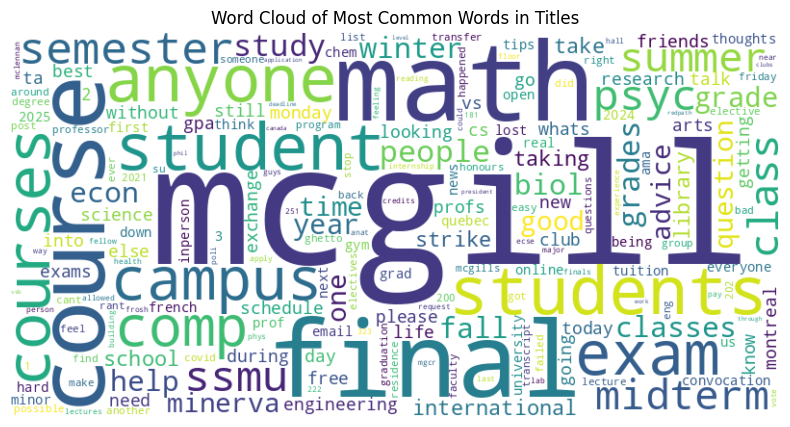

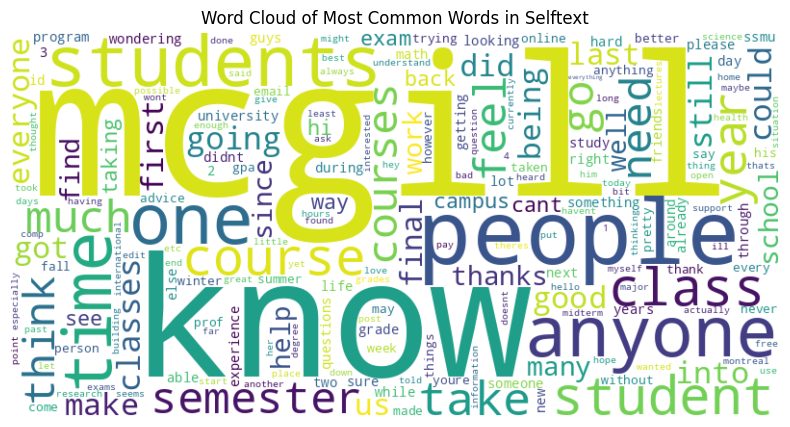

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Generate word clouds
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_counts)
selftext_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(selftext_word_counts)

#Title word cloud
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Titles")
plt.show()

#Selftext word cloud
plt.figure(figsize=(10, 5))
plt.imshow(selftext_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Selftext")
plt.show()

### 4. Time Based Analysis

In [ ]:
print(df.columns)

Index(['title', 'selftext', 'created_utc', 'upvotes', 'url', 'num_comments',
       'author', 'post_id', 'created_readable'],
      dtype='object')


### 5. FILTER OUT IRRELEVANT WORDS + LEMMITIZE FOR BETTER INSIGHTS

In [71]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Load NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Additional custom stopwords specific to the dataset
custom_stopwords = nltk_stopwords.union(set([
    "mcgill", "wa", "ha", "like", "know", "would", "get", "dont", "people",
    "anyone", "one", "time", "really", "also", "year", "take", "students",
    "make", "think", "look", "could", "im", "ive"
]))

# Updated text preprocessing function (Lowercasing, Removing Punctuation, Stopwords, and Lemmatization)
def preprocess_text(text):
    words = str(text).lower().translate(str.maketrans('', '', string.punctuation)).split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]
    return lemmatized_words

# Apply preprocessing and compute word frequencies
# Titles
title_word_counts_filtered = Counter()
df_cleaned['title'].dropna().apply(lambda x: title_word_counts_filtered.update(preprocess_text(x)))

# Self-text
selftext_word_counts_filtered = Counter()
df_cleaned['selftext'].dropna().apply(lambda x: selftext_word_counts_filtered.update(preprocess_text(x)))

# Convert the filtered word counts to DataFrames
title_word_df_filtered = pd.DataFrame(title_word_counts_filtered.most_common(30), columns=['Word', 'Count'])
selftext_word_df_filtered = pd.DataFrame(selftext_word_counts_filtered.most_common(30), columns=['Word', 'Count'])

# Display results after improved stopword filtering
print("Top 30 Words in Titles (After Stopword Filtering & Lemmatization):")
display(title_word_df_filtered)

print("\nTop 30 Words in Selftext (After Stopword Filtering & Lemmatization):")
display(selftext_word_df_filtered)


Top 30 Words in Titles (After Stopword Filtering & Lemmatization):


Word  Count
0          course    155
1           final    150
2            math    124
3            exam     98
4           grade     85
5           class     81
6            comp     72
7         student     72
8          campus     61
9        semester     60
10           psyc     59
11           ssmu     49
12         winter     49
13          study     46
14       question     42
15           help     41
16        midterm     41
17           econ     38
18           fall     38
19         advice     37
20           prof     37
21           biol     36
22         summer     35
23             ta     34
24              v     33
25  international     33
26         strike     33
27           need     32
28           good     32
29         taking     31


Top 30 Words in Selftext (After Stopword Filtering & Lemmatization):


Word  Count
0       course    986
1        class    966
2      student    555
3         want    501
4         even    466
5     semester    458
6         exam    446
7        final    443
8         feel    439
9         much    405
10          go    400
11        need    392
12       going    364
13       grade    361
14       still    342
15         day    338
16       first    338
17        good    321
18           u    319
19        help    317
20         got    317
21    question    317
22        work    311
23    everyone    307
24      school    301
25        math    298
26        last    297
27      friend    293
28  university    288
29      thanks    286

### 5. Creating WordCloud

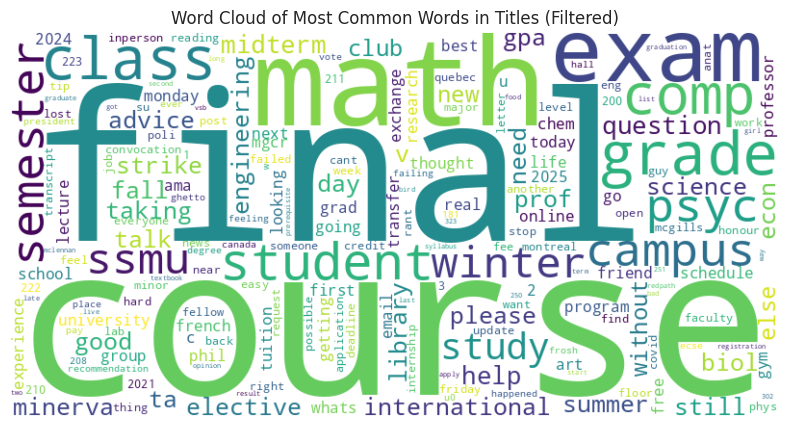

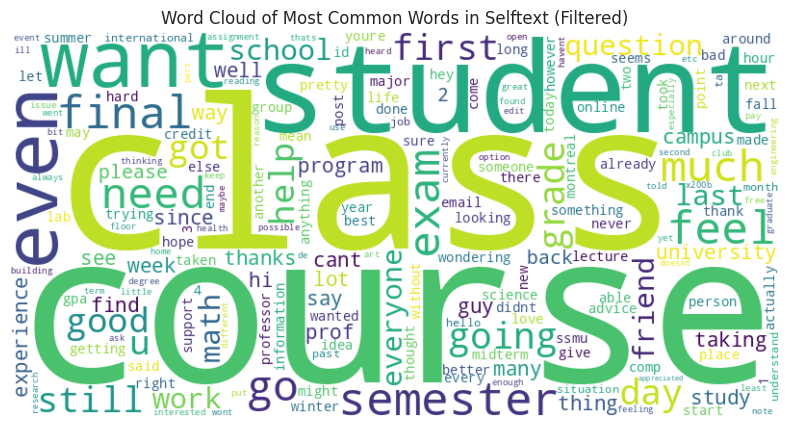

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds using the filtered word counts
title_wordcloud_filtered = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_counts_filtered)
selftext_wordcloud_filtered = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(selftext_word_counts_filtered)

# Title word cloud (Filtered)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud_filtered, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Titles (Filtered)")
plt.show()

# Selftext word cloud (Filtered)
plt.figure(figsize=(10, 5))
plt.imshow(selftext_wordcloud_filtered, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Selftext (Filtered)")
plt.show()


### 6. Time Series Analytics

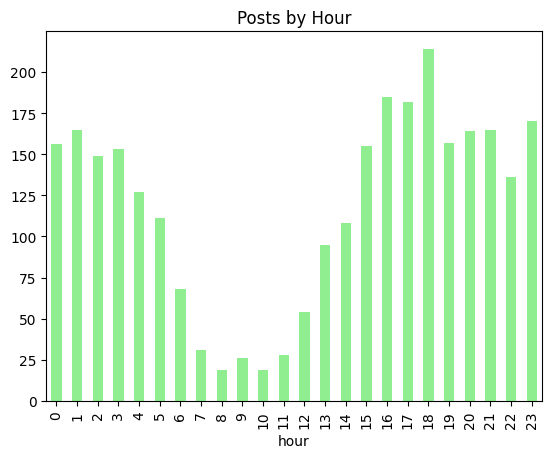

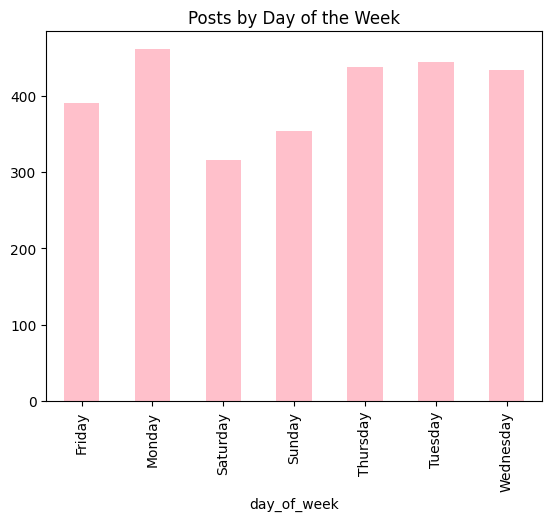

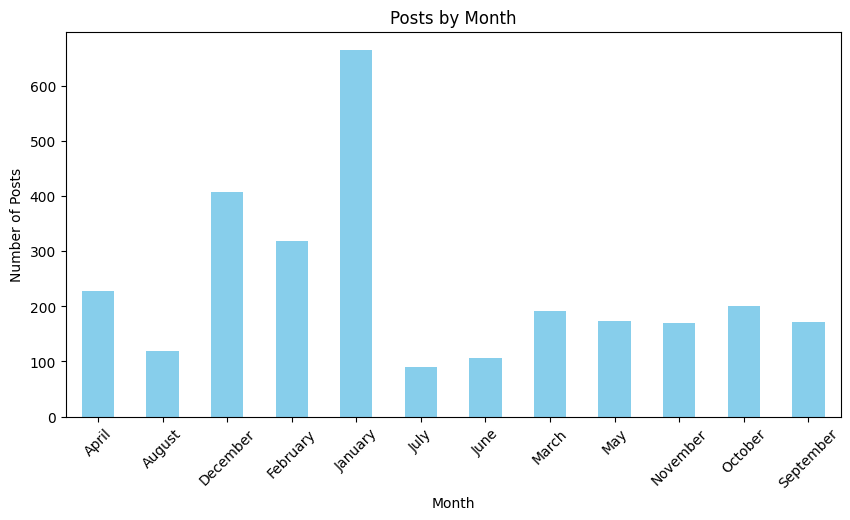

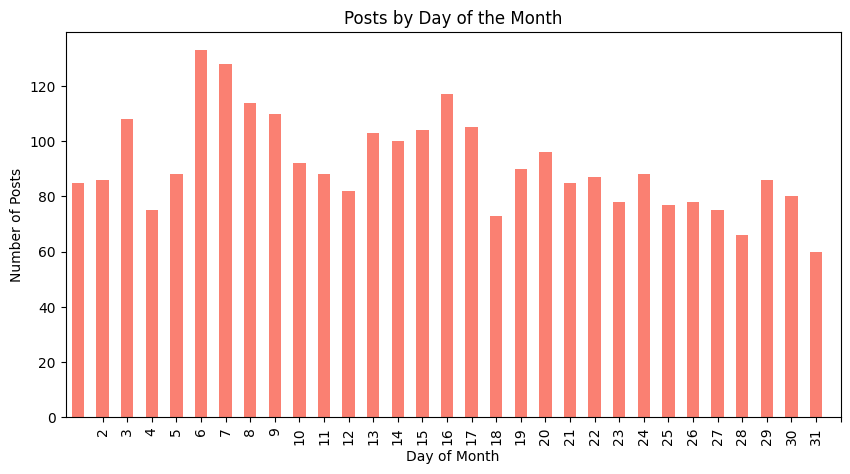

In [ ]:
#Check posts by hour, day of week, month, day of month

df['created_readable'] = pd.to_datetime(df['created_readable'])

#By hour
df['hour'] = df['created_readable'].dt.hour
df.groupby('hour').size().plot(kind='bar', title="Posts by Hour", color="lightgreen")
plt.show()

#Number of posts by day of the week
df['day_of_week'] = df['created_readable'].dt.day_name()
df.groupby('day_of_week').size().plot(kind='bar', title="Posts by Day of the Week", color="pink")
plt.show()

#Extracting relevant time features
df['month'] = df['created_readable'].dt.month_name()
df['day_of_month'] = df['created_readable'].dt.day

# Posts per month
plt.figure(figsize=(10, 5))
df.groupby('month').size().plot(kind='bar', title="Posts by Month", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()


#Posts per day of the month
plt.figure(figsize=(10, 5))
df.groupby('day_of_month').size().plot(kind='bar', title="Posts by Day of the Month", color="salmon")
plt.xlabel("Day of Month")
plt.ylabel("Number of Posts")
plt.xticks(range(1, 32))
plt.show()

### 7. Lift Matrix

Lift Matrix for Top 20 Words:


course     final      math      exam     grade     class  \
course         NaN  1.639060  2.588692  1.485343  1.736160  1.539909   
final     1.639060       NaN  2.127096  3.591052  3.771524  1.731496   
math      2.588692  2.127096       NaN  1.452658  1.829770  1.699317   
exam      1.485343  3.591052  1.452658       NaN  2.030552  1.646869   
grade     1.736160  3.771524  1.829770  2.030552       NaN  1.876838   
class     1.539909  1.731496  1.699317  1.646869  1.876838       NaN   
comp      2.810409  0.954345  6.447761  1.219650  1.667954  1.614953   
student   1.293211  0.750081  1.221681  0.754899  1.136842  1.211215   
campus    0.550611  0.508984       NaN  0.819605  0.400309  0.941287   
semester  2.106886  1.797787  2.306997  1.253218  1.928093  1.763114   
psyc      1.927138  2.004124  1.934328  3.073518  0.875676  2.180187   
ssmu      0.500555  0.231356       NaN  0.266105  0.303264  0.440442   
winter    2.241636  1.113402  2.149254  1.280632  1.054054  1.850467   
study     1.520068  2.286344  1.551600  2.246243  1.061425  1.424959   
question  1.445353  1.936351  0.756911  2.449905  1.522914  1.200683   
help      1.395645  1.201767  1.228145  1.138340  1.019305  1.365020   
midterm   1.517431  3.787320  1.827712  2.823442  3.217706  1.792980   
econ      1.901780  1.875203  3.054203  0.539214  1.843528  1.657452   
fall      2.064790  1.767305  0.767591  1.300960  1.853282  1.576502   
advice    1.639405  1.731959  2.417910  1.351779  1.621622  1.614953   

              comp   student    campus  semester      psyc      ssmu  \
course    2.810409  1.293211  0.550611  2.106886  1.927138  0.500555   
final     0.954345  0.750081  0.508984  1.797787  2.004124  0.231356   
math      6.447761  1.221681       NaN  2.306997  1.934328       NaN   
exam      1.219650  0.754899  0.819605  1.253218  3.073518  0.266105   
grade     1.667954  1.136842  0.400309  1.928093  0.875676  0.303264   
class     1.614953  1.211215  0.941287  1.763114  2.180187  0.440442   
comp           NaN  1.380451  0.176327  2.453473  0.771429       NaN   
student   1.380451       NaN  2.065805  1.418445  1.023158  3.454819   
campus    0.176327  2.065805       NaN  0.588834       NaN  2.692987   
semester  2.453473  1.418445  0.588834       NaN  1.981651  1.029429   
psyc      0.771429  1.023158       NaN  1.981651       NaN       NaN   
ssmu           NaN  3.454819  2.692987  1.029429       NaN       NaN   
winter    2.142857  1.847368  1.028571  3.467890  3.150000  1.636364   
study     1.155080  1.568477  1.663316  1.356424  0.693048  0.900063   
question  1.744099  1.601465  1.030360  1.137296  2.535652  2.927160   
help      1.959184  2.084211  0.822857  1.384010  1.542857  1.602968   
midterm   1.457818  0.644509  0.816378  1.497941  2.551181  0.265058   
econ      1.624060  0.359003       NaN  1.460164  5.115789       NaN   
fall      1.224490  2.219549  1.998367  2.201835  1.542857  2.671614   
advice    2.357143  1.942105  0.822857  1.926606  0.450000  0.701299   

            winter     study  question      help   midterm      econ  \
course    2.241636  1.520068  1.445353  1.395645  1.517431  1.901780   
final     1.113402  2.286344  1.936351  1.201767  3.787320  1.875203   
math      2.149254  1.551600  0.756911  1.228145  1.827712  3.054203   
exam      1.280632  2.246243  2.449905  1.138340  2.823442  0.539214   
grade     1.054054  1.061425  1.522914  1.019305  3.217706  1.843528   
class     1.850467  1.424959  1.200683  1.365020  1.792980  1.657452   
comp      2.142857  1.155080  1.744099  1.959184  1.457818  1.624060   
student   1.847368  1.568477  1.601465  2.084211  0.644509  0.359003   
campus    1.028571  1.663316  1.030360  0.822857  0.816378       NaN   
semester  3.467890  1.356424  1.137296  1.384010  1.497941  1.460164   
psyc      3.150000  0.693048  2.535652  1.542857  2.551181  5.115789   
ssmu      1.636364  0.900063  2.927160  1.602968  0.265058       NaN   
winter         NaN  1.443850  1.252174  1.571429  

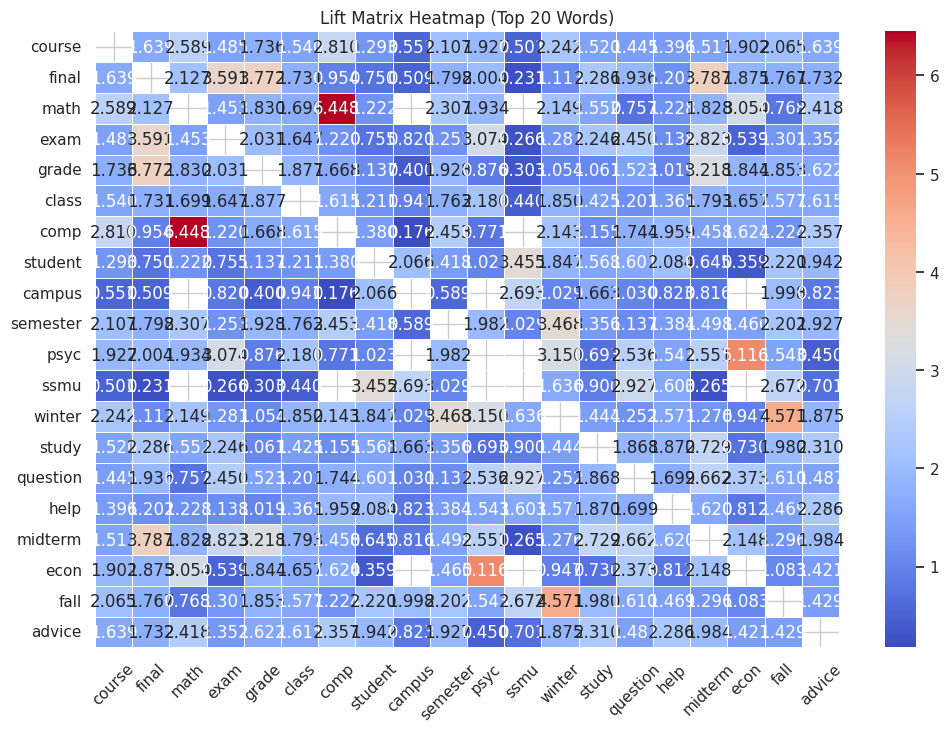

In [73]:
###########
##LIFT####

import numpy as np
import seaborn as sns

# Get the list of top words for lift analysis (Top 20 words from title word frequency)
top_words = list(title_word_df_filtered['Word'])[:20]

# Initialize a co-occurrence matrix
co_occurrence_matrix = np.zeros((len(top_words), len(top_words)))

# Compute co-occurrences from selftext data
for _, row in df_cleaned.iterrows():
    words_in_post = set(preprocess_text(row['selftext']))
    for i, word1 in enumerate(top_words):
        for j, word2 in enumerate(top_words):
            if word1 in words_in_post and word2 in words_in_post:
                co_occurrence_matrix[i][j] += 1

# Compute Lift Matrix
total_posts = len(df_cleaned)
lift_matrix = np.zeros((len(top_words), len(top_words)))

for i in range(len(top_words)):
    for j in range(len(top_words)):
        prob_word1 = co_occurrence_matrix[i][i] / total_posts
        prob_word2 = co_occurrence_matrix[j][j] / total_posts
        joint_prob = co_occurrence_matrix[i][j] / total_posts

        lift_matrix[i][j] = joint_prob / (prob_word1 * prob_word2) if prob_word1 * prob_word2 > 0 else 0

# Convert to DataFrame
lift_df = pd.DataFrame(lift_matrix, index=top_words, columns=top_words)

# Replace diagonal with NaN to avoid misleading high self-co-occurrence values
np.fill_diagonal(lift_matrix, np.nan)
lift_df.replace(0, np.nan, inplace=True)

# Display Lift Matrix DataFrame
print("Lift Matrix for Top 20 Words:")
display(lift_df)

# Visualize Lift Matrix as a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(lift_df, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)
plt.title('Lift Matrix Heatmap (Top 20 Words)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### 8.Creating MDS Plot

Word: course | X: 0.24, Y: -0.25
Word: final | X: 0.00, Y: -0.54
Word: math | X: 12.32, Y: -99.58
Word: exam | X: -0.19, Y: -0.32
Word: grade | X: 0.09, Y: -0.51
Word: class | X: 0.03, Y: -0.19
Word: comp | X: 6.21, Y: -50.19
Word: student | X: -0.05, Y: 0.74
Word: campus | X: -18.55, Y: 149.84
Word: semester | X: 0.22, Y: -0.05
Word: psyc | X: 12.34, Y: -99.74
Word: ssmu | X: -24.68, Y: 199.56
Word: winter | X: 0.19, Y: 0.20
Word: study | X: -0.20, Y: 0.33
Word: question | X: -0.29, Y: 0.12
Word: help | X: 0.10, Y: 0.37
Word: midterm | X: -0.06, Y: -0.46
Word: econ | X: 12.36, Y: -99.88
Word: fall | X: -0.03, Y: 0.41
Word: advice | X: -0.04, Y: 0.15


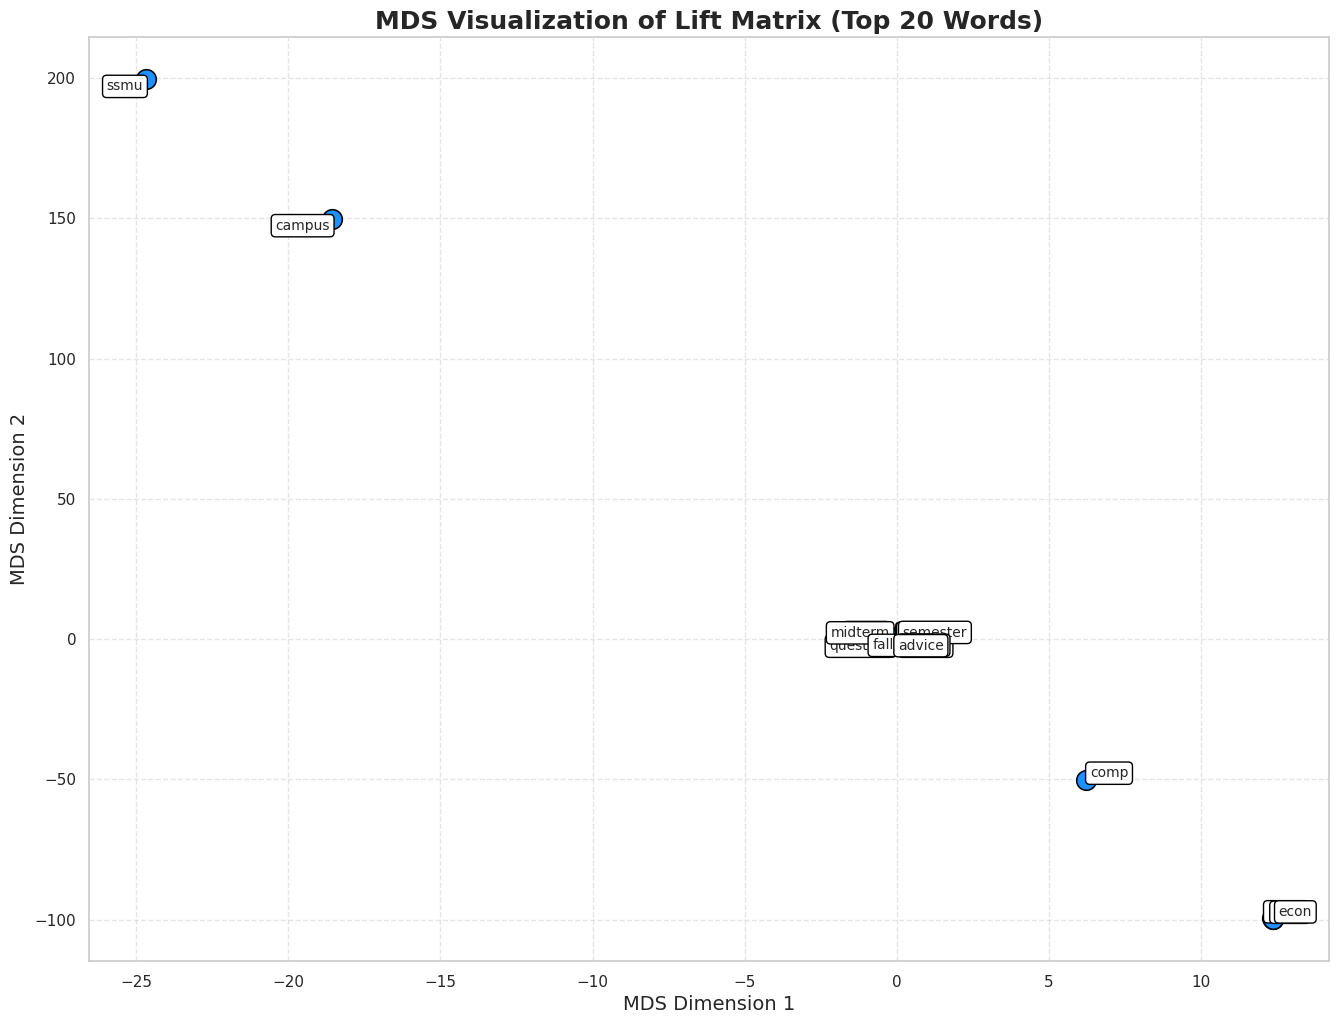

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Replace NaN values in Lift Matrix with a small number to avoid errors
lift_matrix_filled = lift_df.fillna(0.001)

# Apply MDS to reduce the high-dimensional Lift Matrix to 2D
mds = MDS(n_components=2, random_state=42, dissimilarity="precomputed")
mds_coords = mds.fit_transform(1 / (lift_matrix_filled + 1e-6))  # Avoid division by zero errors

# Create a DataFrame for visualization
mds_df = pd.DataFrame(mds_coords, columns=["X", "Y"], index=lift_df.index)

# Improve MDS visualization readability
plt.figure(figsize=(16, 12))
sns.scatterplot(x=mds_df["X"], y=mds_df["Y"], s=200, color="dodgerblue", edgecolor="black")

# Adjust text placement dynamically with jitter effect
np.random.seed(42)  # Ensure consistent jittering
jitter = np.random.uniform(-0.2, 0.2, size=mds_df.shape)

for word, (x, y) in zip(mds_df.index, mds_coords + jitter):
    ha = 'right' if x < np.median(mds_df["X"]) else 'left'
    va = 'bottom' if y < np.median(mds_df["Y"]) else 'top'
    plt.text(x, y, word, fontsize=10, ha=ha, va=va,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Print words and their positions
for word, (x, y) in zip(mds_df.index, mds_coords):
    print(f"Word: {word} | X: {x:.2f}, Y: {y:.2f}")

# Improve plot aesthetics
plt.title("MDS Visualization of Lift Matrix (Top 20 Words)", fontsize=18, fontweight="bold")
plt.xlabel("MDS Dimension 1", fontsize=14)
plt.ylabel("MDS Dimension 2", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [75]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.spatial.distance as ssd

# Perform hierarchical clustering
distance_matrix = ssd.pdist(mds_coords)  # Compute distance matrix
linkage_matrix = linkage(distance_matrix, method='ward')  # Apply hierarchical clustering
num_clusters = 4  # Adjust based on desired grouping
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the DataFrame
mds_df["Cluster"] = clusters

# Sort by cluster for better readability
mds_df_sorted = mds_df.sort_values(by="Cluster")

# Display the cluster table
print(mds_df_sorted)


                  X           Y  Cluster
ssmu     -24.680391  199.556738        1
campus   -18.551389  149.843312        1
course     0.235642   -0.246368        2
midterm   -0.058761   -0.458726        2
help       0.096210    0.369982        2
question  -0.287275    0.116851        2
study     -0.197150    0.325339        2
winter     0.187790    0.195691        2
fall      -0.027848    0.409560        2
semester   0.217941   -0.046898        2
class      0.025694   -0.189624        2
grade      0.087684   -0.505415        2
exam      -0.190142   -0.324544        2
final      0.000059   -0.544098        2
student   -0.053664    0.744725        2
advice    -0.036381    0.150467        2
psyc      12.343688  -99.744662        3
math      12.322012  -99.578179        3
econ      12.359736  -99.880296        3
comp       6.206545  -50.193854        4


# Lift Insights

Strong Associations (High Lift)
Math & Comp → Strongest link, frequent co-occurrence.
Final & Midterm → Commonly discussed together, exam stress.
Exam & Grade → High concern over academic performance.
Psyc & Econ → Likely shared coursework/student overlap.


Weak Associations (Low Lift)
Campus & Courses → Campus discussions not course-focused.
SSMU & Courses → Student gov. rarely tied to academics.
Winter & Courses → Less emphasis on specific classes.
Topic Clusters

Exams & Performance → Exam, final, midterm, grade cluster.
Course Selection & Advice → Course, help, advice, question.
STEM-Focused → Math, comp, psyc cluster.
General Academics → Study, semester, campus.

MDS Insights
Cluster 1 (Campus & Institutional Topics): Student govt (SSMU), campus life
Cluster 2 (General Academic Experience): Exams, courses, grades, study help
Cluster 3 (STEM & Social Sciences): Math, econ, psych discussions
Cluster 4 (Computer Science): Comp sci unique, distinct from others

## Build a classifier model based on labeled datasets

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Connect to google
import os
from google.colab import drive
drive.mount('/content/drive')
os.listdir('/content')

# Model based on Depression Dataset

##Base Model

In [ ]:

df_depression = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')

# Check the first few rows to confirm it's loaded correctly
print(df_depression.head())

                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1


because of empty values in dataset, the lower() didnt work, hence only process fields for training that are not null

In [ ]:
# Text Preprocessing Function with NaN check
def clean_text(text):
    if pd.isna(text):  # Check if the value is NaN
        return ''
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [ ]:
# Apply the cleaning function to the 'body' column
df_depression['cleaned_text'] = df_depression['clean_text'].apply(clean_text)
df_depression['cleaned_text'].head(5)

0    understand people reply immediately op invitat...
1    welcome r depression check post place take mom...
2    anyone else instead sleeping depressed stay ni...
3    kind stuffed around lot life delaying inevitab...
4    sleep greatest comforting escape whenever wake...
Name: cleaned_text, dtype: object

In [ ]:
# # Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df_depression['cleaned_text'], df_depression['is_depression'], test_size=0.2, random_state=42)

1. Pipeline:
A pipeline is a way to streamline the process of data transformation and model training in one sequence. It ensures that all preprocessing steps (like vectorizing text) and model fitting are applied consistently in the correct order, and you can train the model and make predictions using a single call. In this case, the pipeline consists of two steps: TF-IDF vectorization and logistic regression.

2. TfidfVectorizer(max_features=5000):
The TfidfVectorizer converts text data into numerical form that can be fed into a machine learning model. Here's what happens inside:

TF-IDF: This is a statistical method used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It considers both:

Term Frequency (TF): How often a word appears in a document.
Inverse Document Frequency (IDF): How common or rare a word is across all documents. If a word is very common across all documents (e.g., "the", "is"), it gets a lower weight. Conversely, if a word is rare but appears in a few documents, it gets a higher weight.
max_features=5000: This limits the number of features (words) used by the model. Only the top 5000 words based on their TF-IDF score will be used for vectorization. This helps prevent overfitting and reduces computational complexity.

3. LogisticRegression():
This is a simple linear classifier used for classification tasks. Logistic Regression predicts the probability that an input belongs to a certain class (in this case, a category from the label column).

Why Logistic Regression?: Logistic regression is commonly used for text classification because it works well with high-dimensional sparse data, like the output from TF-IDF vectorization.

Model training: It will be trained on the TF-IDF features extracted from the body column, and the model will learn to predict the label of each text based on these features.

Summary:
This pipeline:

Vectorizes the text using TF-IDF, converting the text data into numerical features (5000 most important words).
Trains a Logistic Regression model on these features to classify the text into categories based on the label column.

In [ ]:
# Build TF-IDF + Logistic Regression Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Convert text to numerical form
    ('clf', LogisticRegression())  # Train Logistic Regression model
])

In [ ]:
# Train Model
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression())])

In [ ]:
# Evaluate Model
Y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9502262443438914
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       783
           1       0.97      0.92      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
# Load unlabeled dataset
unlabeled_df = pd.read_csv("final_cleaned_RedditMcGill.csv")  # Ensure it has a 'body' column
unlabeled_df['cleaned_text'] = unlabeled_df['selftext'].apply(clean_text)

In [ ]:
# Predict Labels
unlabeled_df['predicted_label'] = pipeline.predict(unlabeled_df['cleaned_text'])

In [ ]:
# Save Predictions
unlabeled_df.to_csv("predicted_labels.csv", index=False)
print("Predictions saved to predicted_labels.csv")

Predictions saved to predicted_labels.csv


In [ ]:
unlabeled_df['predicted_label'].count()
unlabeled_df['predicted_label'].value_counts()

predicted_label
0    1810
1    1027
Name: count, dtype: int64

In [ ]:
# Filter rows where predicted_label is 0
label_0_rows = unlabeled_df[unlabeled_df['predicted_label'] == 0]
print(label_0_rows)

                                                  title  \
1                          Is Schulich library closed??   
2     Tried to go to the McGill gym today, but then ...   
3                                     PHGY 213 Snow Day   
5                                      good news monday   
6      Best places to go sledding around McGill campus?   
...                                                 ...   
2828                                      Selling Locks   
2829                What has McGill upgraded this year?   
2830               Advice on smoking weed while in Res?   
2833  Advanced Standing, AP Credits and Being Forced...   
2836  McGill Administration disregards student refer...   

                                               selftext   created_utc  \
1     Just wondering if the library is closed today ...  1.739803e+09   
2     I thought that because today was a snow day an...  1.739798e+09   
3     Does anyone know if PHGY 213 is cancelled for ...  1.739795e+09   

In [ ]:
# Filter rows where predicted_label is 1
label_1_rows = unlabeled_df[unlabeled_df['predicted_label'] == 1]
print(label_1_rows)

                                                  title  \
0                                  Who is my advisor ??   
4                         Whats it like doing research?   
16    How do I explain to my white friends that I do...   
19                                Citizenship Questions   
22    Why are engineering majors so arrogant and con...   
...                                                 ...   
2827  Lets talk about our experiences with rape cult...   
2831  Question regarding meal plans which would you ...   
2832                       How doable is this schedule?   
2834                                     Quebec Tuition   
2835                                     Your thoughts?   

                                               selftext   created_utc  \
0     Hi! Who the fuck is my advisor. I feel like Iv...  1.739806e+09   
4     Im wondering what graduate studies entail? I u...  1.739769e+09   
16    Im sorry it might be not that good to share th...  1.739687e+09   

another test dataset

In [ ]:
# Load unlabeled dataset 2
unlabeled_df2 = pd.read_csv("final_cleaned_RedditMcGill.csv")  # Ensure it has a 'body' column
unlabeled_df2['cleaned_text'] = unlabeled_df2['selftext'].apply(clean_text)

# Predict Labels
unlabeled_df2['predicted_label'] = pipeline.predict(unlabeled_df2['cleaned_text'])

# Save Predictions
unlabeled_df2.to_csv("predicted_labels2.csv", index=False)
print("Predictions saved to predicted_labels2.csv")


Predictions saved to predicted_labels2.csv


In [ ]:
unlabeled_df2['predicted_label'].count()
unlabeled_df2['predicted_label'].value_counts()

predicted_label
0    1810
1    1027
Name: count, dtype: int64

In [ ]:
# Filter rows where predicted_label is 0
label_0_rows2 = unlabeled_df2[unlabeled_df2['predicted_label'] == 0]
print(label_0_rows2)

                                                  title  \
1                          Is Schulich library closed??   
2     Tried to go to the McGill gym today, but then ...   
3                                     PHGY 213 Snow Day   
5                                      good news monday   
6      Best places to go sledding around McGill campus?   
...                                                 ...   
2828                                      Selling Locks   
2829                What has McGill upgraded this year?   
2830               Advice on smoking weed while in Res?   
2833  Advanced Standing, AP Credits and Being Forced...   
2836  McGill Administration disregards student refer...   

                                               selftext   created_utc  \
1     Just wondering if the library is closed today ...  1.739803e+09   
2     I thought that because today was a snow day an...  1.739798e+09   
3     Does anyone know if PHGY 213 is cancelled for ...  1.739795e+09   

In [ ]:
# Filter rows where predicted_label is 1
label_1_rows2 = unlabeled_df2[unlabeled_df2['predicted_label'] == 1]
print(label_1_rows2)

                                                  title  \
0                                  Who is my advisor ??   
4                         Whats it like doing research?   
16    How do I explain to my white friends that I do...   
19                                Citizenship Questions   
22    Why are engineering majors so arrogant and con...   
...                                                 ...   
2827  Lets talk about our experiences with rape cult...   
2831  Question regarding meal plans which would you ...   
2832                       How doable is this schedule?   
2834                                     Quebec Tuition   
2835                                     Your thoughts?   

                                               selftext   created_utc  \
0     Hi! Who the fuck is my advisor. I feel like Iv...  1.739806e+09   
4     Im wondering what graduate studies entail? I u...  1.739769e+09   
16    Im sorry it might be not that good to share th...  1.739687e+09   

## Exploring Model's Hypertunning

In [ ]:
df_depression.shape

(7731, 3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...

Evaluating Logistic Regression...


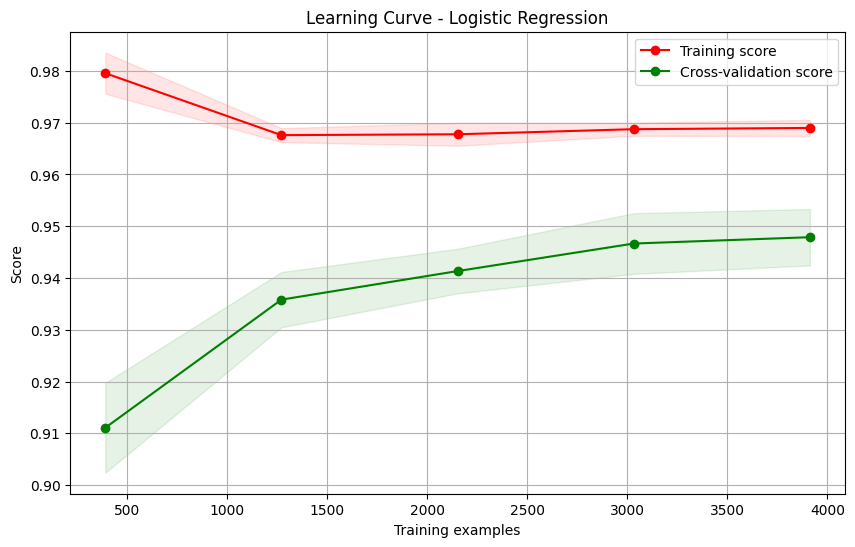


Model: Logistic Regression
Training Score: 0.9681
Validation Score: 0.9575
Test Score: 0.9556
Cross-validation: 0.9477 (+/- 0.0128)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       767
           1       0.97      0.94      0.95       763

    accuracy                           0.96      1530
   macro avg       0.96      0.96      0.96      1530
weighted avg       0.96      0.96      0.96      1530


Evaluating SVM...


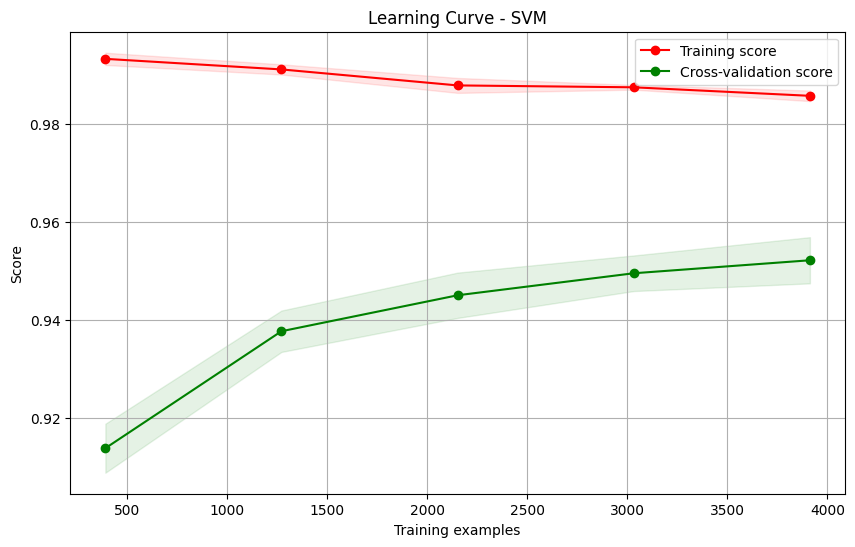


Model: SVM
Training Score: 0.9859
Validation Score: 0.9600
Test Score: 0.9654
Cross-validation: 0.9530 (+/- 0.0110)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       767
           1       0.98      0.95      0.96       763

    accuracy                           0.97      1530
   macro avg       0.97      0.97      0.97      1530
weighted avg       0.97      0.97      0.97      1530


Evaluating Random Forest...


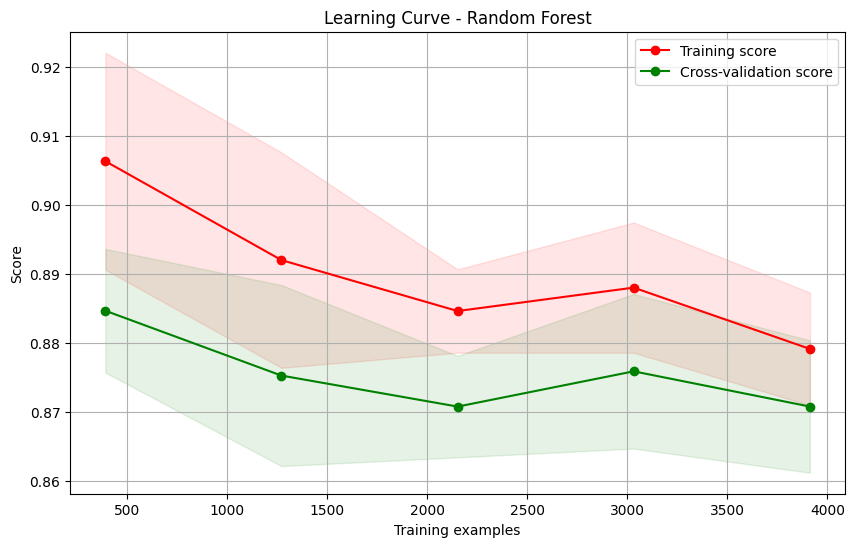


Model: Random Forest
Training Score: 0.8962
Validation Score: 0.8913
Test Score: 0.8967
Cross-validation: 0.8714 (+/- 0.0203)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       767
           1       0.99      0.80      0.89       763

    accuracy                           0.90      1530
   macro avg       0.91      0.90      0.90      1530
weighted avg       0.91      0.90      0.90      1530


Final Results Summary:
                 Model  Train Score  Validation Score  Test Score  CV Mean  \
0  Logistic Regression       0.9681            0.9575      0.9556   0.9477   
1                  SVM       0.9859            0.9600      0.9654   0.9530   
2        Random Forest       0.8962            0.8913      0.8967   0.8714   

   CV Std  
0  0.0064  
1  0.0055  
2  0.0101  

Best Model: SVM

Analyzing errors for best model...

Error Analysis:
Total errors: 53

Sample misclassified texts:

Text: chick year ago

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters but keep important punctuation
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)

    # Normalize spacing
    text = ' '.join(text.split())

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Ensure minimum content
    if len(words) < 2:  # Ignore very short texts
        return ''

    return ' '.join(words)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Load and preprocess data
print("Loading and preprocessing data...")
df_depression = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')
df_depression['cleaned_text'] = df_depression['clean_text'].apply(enhanced_clean_text)

# Remove empty texts after cleaning
df_depression = df_depression[df_depression['cleaned_text'] != '']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df_depression['cleaned_text'],
    df_depression['is_depression'],
    test_size=0.2,
    random_state=42,
    stratify=df_depression['is_depression']
)

# Create validation set from training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Define models with regularization
models = {
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=3000,  # Reduced features
            min_df=2,          # Minimum document frequency
            max_df=0.95        # Maximum document frequency
        )),
        ('clf', LogisticRegression(
            C=1.0,            # Regularization strength
            class_weight='balanced',
            max_iter=1000
        ))
    ]),

    'SVM': Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=3000,
            min_df=2,
            max_df=0.95
        )),
        ('clf', SVC(
            kernel='linear',
            C=1.0,
            class_weight='balanced',
            probability=True
        ))
    ]),

    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=3000,
            min_df=2,
            max_df=0.95
        )),
        ('clf', RandomForestClassifier(
            n_estimators=100,
            max_depth=10,      # Limit tree depth
            min_samples_split=5,
            min_samples_leaf=2,
            class_weight='balanced',
            random_state=42
        ))
    ])
}

# Function to evaluate model on validation set
def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    return train_score, val_score

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Perform k-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

    # Get training and validation scores
    train_score, val_score = evaluate_model(model, X_train, X_val, y_train, y_val)

    # Plot learning curve
    plot_learning_curve(model, f'Learning Curve - {name}',
                       X_train, y_train, cv=cv)
    plt.show()

    # Make predictions on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Validation Score': val_score,
        'Test Score': accuracy_score(y_test, y_pred),
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

    # Print detailed results
    print(f"\nModel: {name}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Validation Score: {val_score:.4f}")
    print(f"Test Score: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(results_df.round(4))

# Select best model based on validation score
best_model_name = results_df.loc[results_df['Validation Score'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

# Function to analyze prediction errors
def analyze_errors(model, X_test, y_test, n_examples=5):
    y_pred = model.predict(X_test)
    errors = X_test[y_pred != y_test]
    true_labels = y_test[y_pred != y_test]
    pred_labels = y_pred[y_pred != y_test]

    print("\nError Analysis:")
    print(f"Total errors: {len(errors)}")
    print("\nSample misclassified texts:")

    for text, true_label, pred_label in zip(errors.iloc[:n_examples], true_labels.iloc[:n_examples], pred_labels[:n_examples]):
        print(f"\nText: {text[:200]}...")
        print(f"True label: {true_label}")
        print(f"Predicted label: {pred_label}")

# Analyze errors for best model
print("\nAnalyzing errors for best model...")
best_model.fit(X_train, y_train)
analyze_errors(best_model, X_test, y_test)

# Apply to new dataset with confidence threshold
print("\nApplying model to new dataset...")
unlabeled_df = pd.read_csv("final_cleaned_RedditMcGill.csv")
unlabeled_df['cleaned_text'] = unlabeled_df['selftext'].apply(enhanced_clean_text)

# Get predictions and probabilities
predictions = best_model.predict(unlabeled_df['cleaned_text'])
probabilities = best_model.predict_proba(unlabeled_df['cleaned_text'])

# Add predictions and confidence scores
unlabeled_df['predicted_label'] = predictions
unlabeled_df['confidence'] = np.max(probabilities, axis=1)

# Filter predictions by confidence threshold
CONFIDENCE_THRESHOLD = 0.8
high_confidence_predictions = unlabeled_df[unlabeled_df['confidence'] >= CONFIDENCE_THRESHOLD]

print("\nPrediction Distribution (High Confidence Only):")
print(high_confidence_predictions['predicted_label'].value_counts(normalize=True).round(3) * 100)

# Save results
output_filename = f"predictions_{best_model_name.lower().replace(' ', '_')}_with_confidence.csv"
unlabeled_df.to_csv(output_filename, index=False)
print(f"\nPredictions saved to {output_filename}")

In [ ]:
!pip install scikeras

In [ ]:
!pip install tabulate

## Main Model: Classifying based on Depression Dataset

In [ ]:
!pip install tabulate

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...

Evaluating Logistic Regression...


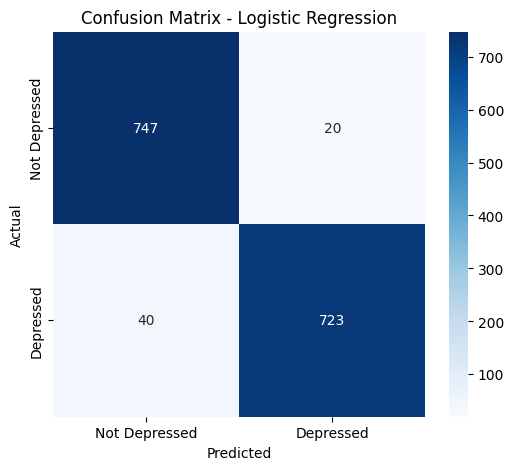


Evaluating SVM...


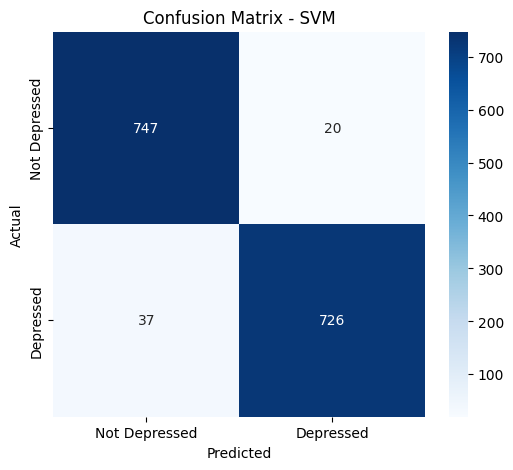


Evaluating Random Forest...


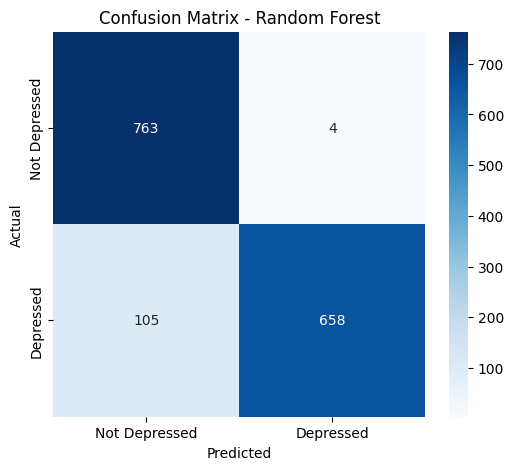


Evaluating AdaBoost...


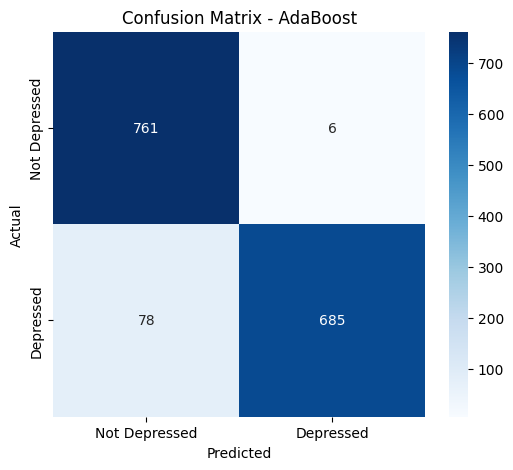


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.9462    |    0.9608     | 0.9608 |  0.9608  |
| 1 |         SVM         |                  {'clf__C': 1}                   |   0.9474    |    0.9627     | 0.9627 |  0.9627  |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 200} |   0.9075    |    0.9288     | 0.9288 |  0.9284  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |    0.92     |    0.9451     | 0.9451 |  0.945   |
+---+---------------------+----------------------------------------------

In [ ]:
#Using Tf-IDF
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words) if len(words) > 1 else ''

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
print("Loading and preprocessing data...")
#df = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')
df = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')

df['cleaned_text'] = df['clean_text'].apply(enhanced_clean_text)
df = df[df['cleaned_text'] != '']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['is_depression'], test_size=0.2, random_state=42, stratify=df['is_depression']
)

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}


# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train, y_train)
    best_params = model.best_params_
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1
    })


# Print results summary in a beautiful table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))

### Applying SMOTE and Hupertunning

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...
Class distribution after SMOTE:
 is_depression
1    3066
0    3066
Name: count, dtype: int64

Evaluating Logistic Regression...
Logistic Regression - Precision 0: 0.950381679389313, Precision 1: 0.9731182795698925
Logistic Regression - Recall 0: 0.9739243807040417, Recall 1: 0.9488859764089121
Logistic Regression - F1 0: 0.9620090148100451, F1 1: 0.9608493696084937


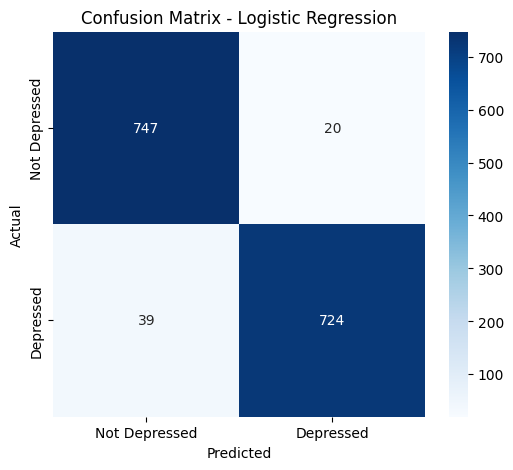


Evaluating SVM...
SVM - Precision 0: 0.9540229885057471, Precision 1: 0.9732262382864793
SVM - Recall 0: 0.9739243807040417, Recall 1: 0.9528178243774574
SVM - F1 0: 0.9638709677419355, F1 1: 0.9629139072847682


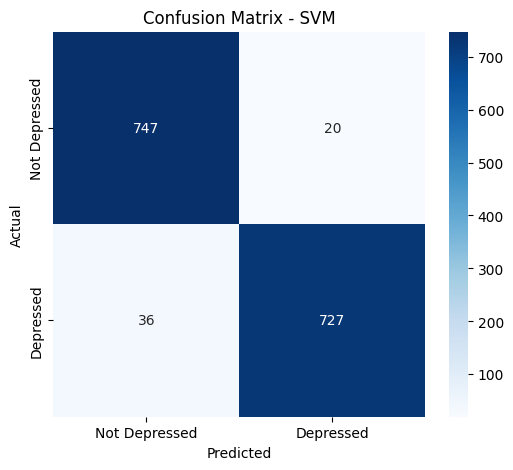


Evaluating Random Forest...
Random Forest - Precision 0: 0.8707093821510298, Precision 1: 0.9908536585365854
Random Forest - Recall 0: 0.9921773142112125, Recall 1: 0.8519003931847968
Random Forest - F1 0: 0.9274832419256551, F1 1: 0.916138125440451


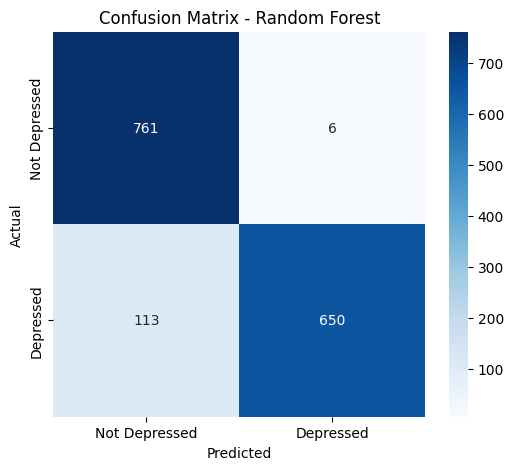


Evaluating AdaBoost...
AdaBoost - Precision 0: 0.9070321811680572, Precision 1: 0.9913169319826338
AdaBoost - Recall 0: 0.9921773142112125, Recall 1: 0.8977719528178244
AdaBoost - F1 0: 0.9476961394769614, F1 1: 0.9422283356258597


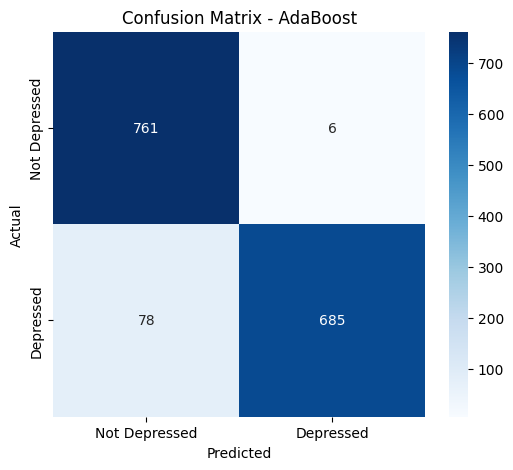


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.9454    |    0.9614     | 0.9614 |  0.9614  |
| 1 |         SVM         |                  {'clf__C': 1}                   |   0.9023    |    0.9634     | 0.9634 |  0.9634  |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 100} |   0.9019    |    0.9222     | 0.9222 |  0.9218  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |   0.9196    |    0.9451     | 0.9451 |  0.945   |
+---+---------------------+----------------------------------------------

In [ ]:
# USING TF-IDF
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words) if len(words) > 1 else ''

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
print("Loading and preprocessing data...")
df = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')

df['cleaned_text'] = df['clean_text'].apply(enhanced_clean_text)
df = df[df['cleaned_text'] != '']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['is_depression'], test_size=0.2, random_state=42, stratify=df['is_depression']
)

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.01, 0.1, 1, 10, 100]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train_resampled, y_train_resampled)
    best_params = model.best_params_
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)

    print(f"{name} - Precision 0: {precision_0}, Precision 1: {precision_1}")
    print(f"{name} - Recall 0: {recall_0}, Recall 1: {recall_1}")
    print(f"{name} - F1 0: {f1_0}, F1 1: {f1_1}")

    recall_weighted = (recall_0 * y_test.value_counts()[0] + recall_1 * y_test.value_counts()[1]) / len(y_test)
    f1_weighted = (f1_0 * y_test.value_counts()[0] + f1_1 * y_test.value_counts()[1]) / len(y_test)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': recall_weighted,
        'F1-Score': f1_weighted
    })

# Print results summary in a table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))


In [ ]:
# Extract the best SVM estimator directly from GridSearchCV results
best_svm_pipeline = models['SVM'].best_estimator_

# Load new dataset
print("\nApplying the best SVM model to new dataset...")
#mcGill_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_analytics_Proj/final_cleaned_RedditMcGill.csv")
mcGill_df = pd.read_csv("final_cleaned_RedditMcGill.csv")

# Ensure text preprocessing is applied
mcGill_df['cleaned_text'] = mcGill_df['selftext'].apply(enhanced_clean_text)

# Predict labels using the best pipeline (TF-IDF + SVM)
mcGill_df['TF_IDF_ِDepression_Prediction'] = best_svm_pipeline.predict(mcGill_df['cleaned_text'])

mcGill_df


Applying the best SVM model to new dataset...


title  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2587                       How doable is this schedule?   
2588  Advanced Standing, AP Credits and Being Forced...   
2589                                     Quebec Tuition   
2590                                     Your thoughts?   
2591  McGill Administration disregards student refer...   

                                               selftext   created_utc  \
0     Hi, I spend a lot of time in the campus and I ...  1.737600e+09   
1     httpswww.mcgill.castudy20242025universityregul...  1.737598e+09   
2     Ive contacted them through email and through t...  1.737584e+09   
3     The Biosignals and Systems Analysis Lab at McG...  1.737578e+09   
4     How and when do we apply to get our graduation...  1.737575e+09   
...                                                 ...           ...   
2587  Hey everyone! So Im going to be attending McGi...  1.338902e+09   
2588  Hey guys. Ill be attending mcgill for commerce...  1.338055e+09   
2589  Well, Im a student from Ontario going into U2 ...  1.337907e+09   
2590  I came here because, well, this is McGill.  Th...  1.335448e+09   
2591  In a joint letter to CKUT and QPIRG McGill, th...  1.326559e+09   

      upvotes                                                url  \
0           9  https://www.reddit.com/r/mcgill/comments/1i7t6...   
1           2  https://www.reddit.com/r/mcgill/comments/1i7sp...   
2           6  https://www.reddit.com/r/mcgill/comments/1i7nn...   
3          22  https://www.reddit.com/r/mcgill/comments/1i7l5...   
4           4  https://www.reddit.com/r/mcgill/comments/1i7jr...   
...       ...                                                ...   
2587        1  https://www.reddit.com/r/mcgill/comments/um0fy...   
2588        0  https://www.reddit.com/r/mcgill/comments/u67l7...   
2589        0  https://www.reddit.com/r/mcgill/comments/u3p5s...   
2590        0  https://www.reddit.com/r/mcgill/comments/stjo6...   
2591        0  https://www.reddit.com/r/mcgill/comments/ogvdv...   

      num_comments             author  post_id     created_readable  \
0                8  franticpizzaeater  1i7t6ep  2025-01-23 02:32:10   
1                8           PowerZox  1i7spkt  2025-01-23 02:08:36   
2                0       chocolover28  1i7nniv  2025-01-22 22:16:52   
3                2          biosigsys  1i7l57g  2025-01-22 20:31:43   
4                1     Other-Link4919  1i7jrw2  2025-01-22 19:36:01   
...            ...                ...      ...                  ...   
2587            15         jokeofweek    um0fy  2012-06-05 13:11:44   
2588             7            duykur1    u67l7  2012-05-26 17:58:24   
2589            11   RitalIN-RitalOUT    u3p5s  2012-05-25 00:55:53   
2590             9  yawnlikeyoumeanit    stjo6  2012-04-26 13:54:34   
2591             7            ruoraze    ogvdv  2012-01-14 16:38:08   

                                           cleaned_text  \
0     hi spend lot time campus wondering microwaving...   
1     best computer engineering? seem really old obs...   
2     ive contacted email contact form website never...   
3     biosignals systems analysis lab mcgill current...   
4     apply get graduation pictures? im graduating e...   
...                                                 ...   
2587  hey everyone! im going attending mcgill next f...   
2588  hey guys. ill attending mcgill commerce next y...   
2589  well im student ontario going u next year. im ...   
2590  came well mcgill. opportunities ill attending ...   
2591  joint letter ckut qpirg mcgill mcgill administ...   

      TF_IDF_ِDepression_Prediction  
0                                 0  
1        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...

Evaluating Logistic Regression...


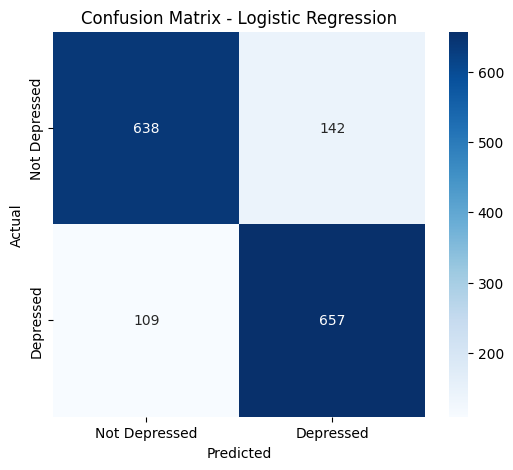


Evaluating SVM...


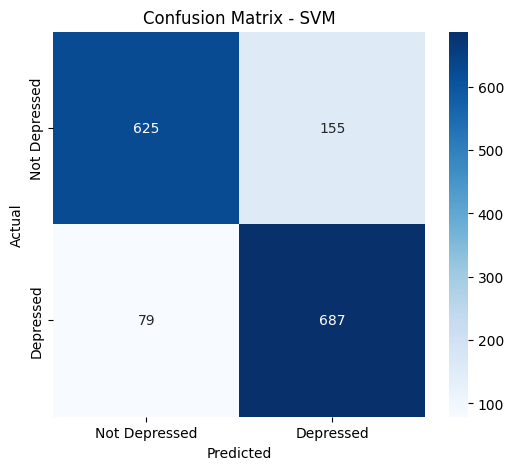


Evaluating Random Forest...


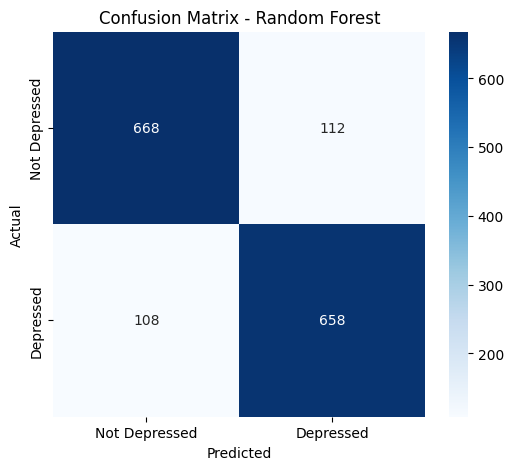


Evaluating AdaBoost...


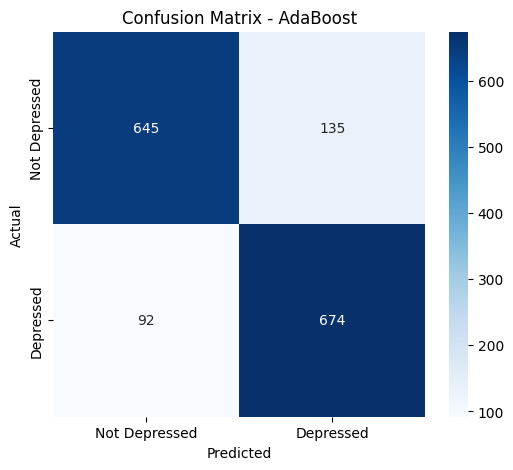


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.7888    |    0.8376     | 0.8376 |  0.8376  |
| 1 |         SVM         |                  {'clf__C': 10}                  |   0.8068    |    0.8486     | 0.8486 |  0.8483  |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 100} |    0.86     |    0.8577     | 0.8577 |  0.8577  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |   0.8396    |    0.8532     | 0.8532 |  0.8531  |
+---+---------------------+----------------------------------------------

In [ ]:
#Using word2Vec

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # Return list of words for Word2Vec

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
print("Loading and preprocessing data...")
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_analytics_Proj/depression_dataset_reddit_cleaned.csv", sep=',')
df = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')

df['cleaned_text'] = df['clean_text'].apply(enhanced_clean_text)
df = df[df['cleaned_text'].apply(len) > 0]

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['is_depression'], test_size=0.2, random_state=42, stratify=df['is_depression']
)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)

def get_w2v_embedding(text, model, vector_size=300):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Transform text data using Word2Vec embeddings
X_train_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_train])
X_test_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_test])

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train_w2v, y_train)
    best_params = model.best_params_
    y_pred = model.predict(X_test_w2v)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1
    })

# Print results summary in a beautiful table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))

In [ ]:
mcGill_df

#Rename column TF_IDF_Prediction to TF_IDF_Depression_Prediction
mcGill_df[mcGill_df['TF_IDF_ِDepression_Prediction'] == 1]['selftext']

3       The Biosignals and Systems Analysis Lab at McG...
5       1. Has anyone completed this program? How was ...
8       Hi, Im a second year mech eng student. Im taki...
12      Im definitely not depressed lol but Im just tr...
13      I think this is crazy and you tell me if this ...
                              ...                        
2582    NOW THAT YOU HAVE YOUR TUITION REFUND, I PROPO...
2583    Its a hot topic lately and what better way to ...
2586    Hey guys,\n\nIm going to be a full time studen...
2589    Well, Im a student from Ontario going into U2 ...
2590    I came here because, well, this is McGill.  Th...
Name: selftext, Length: 1100, dtype: object

### Applying Advanced Hypertunning and SMOTE for higher evaluation metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...

Evaluating Logistic Regression...


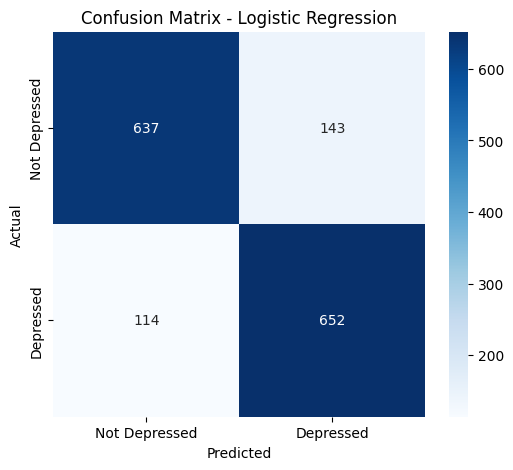


Evaluating SVM...


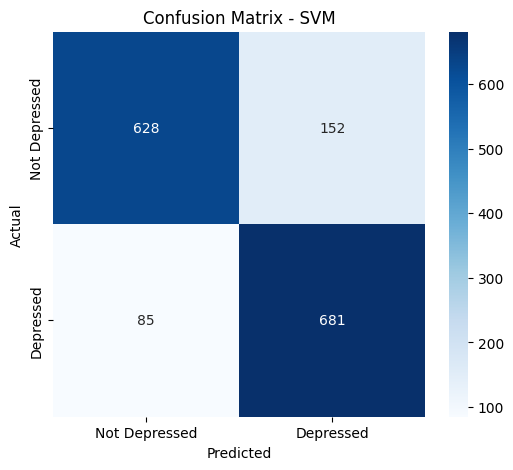


Evaluating Random Forest...


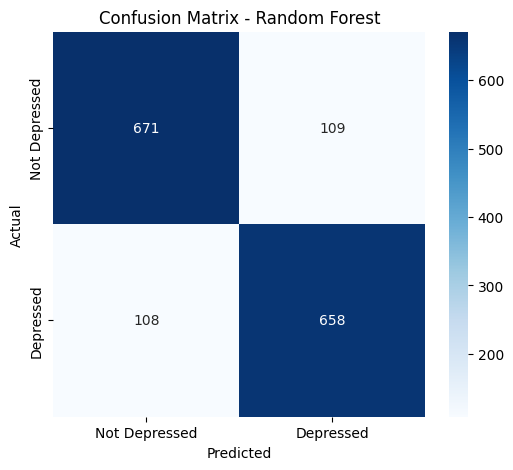


Evaluating AdaBoost...


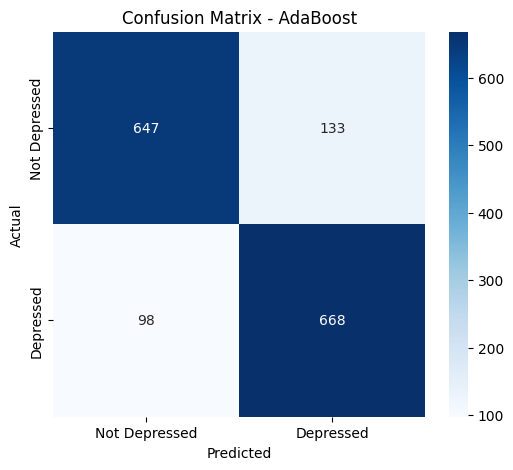


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.7863    |    0.8338     | 0.8338 |  0.8337  |
| 1 |         SVM         |                  {'clf__C': 10}                  |   0.8046    |    0.8467     | 0.8467 |  0.8465  |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 200} |   0.8598    |    0.8596     | 0.8596 |  0.8596  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |   0.8384    |    0.8506     | 0.8506 |  0.8505  |
+---+---------------------+----------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # Return list of words for Word2Vec

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
print("Loading and preprocessing data...")
df = pd.read_csv("depression_dataset_reddit_cleaned.csv", sep=',')

df['cleaned_text'] = df['clean_text'].apply(enhanced_clean_text)
df = df[df['cleaned_text'].apply(len) > 0]

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['is_depression'], test_size=0.2, random_state=42, stratify=df['is_depression']
)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)

def get_w2v_embedding(text, model, vector_size=300):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Transform text data using Word2Vec embeddings
X_train_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_train])
X_test_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_test])

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_w2v, y_train)

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train_resampled, y_train_resampled)
    best_params = model.best_params_
    y_pred = model.predict(X_test_w2v)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Print results summary in a beautiful table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))

# Rename column TF_IDF_Prediction to TF_IDF_Depression_Prediction
if 'TF_IDF_Prediction' in mcGill_df.columns:
    mcGill_df.rename(columns={'TF_IDF_Prediction': 'TF_IDF_Depression_Prediction'}, inplace=True)

# Filter rows where prediction is 1
mcGill_df_filtered = mcGill_df[mcGill_df['TF_IDF_Depression_Prediction'] == 1]

# Display filtered results
print(mcGill_df_filtered[['selftext', 'TF_IDF_Depression_Prediction']].head())


In [ ]:
# Ensure text preprocessing is applied
mcGill_df['cleaned_text'] = mcGill_df['selftext'].apply(enhanced_clean_text)

# Convert text to Word2Vec embeddings
mcGill_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in mcGill_df['cleaned_text']])

# Extract the best Random Forest estimator
best_rf_pipeline = models['Random Forest'].best_estimator_

# Predict labels using the best Random Forest model
mcGill_df['Word2Vec_Depression_Prediction'] = best_rf_pipeline.predict(mcGill_w2v)

mcGill_df

title  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2587                       How doable is this schedule?   
2588  Advanced Standing, AP Credits and Being Forced...   
2589                                     Quebec Tuition   
2590                                     Your thoughts?   
2591  McGill Administration disregards student refer...   

                                               selftext   created_utc  \
0     Hi, I spend a lot of time in the campus and I ...  1.737600e+09   
1     httpswww.mcgill.castudy20242025universityregul...  1.737598e+09   
2     Ive contacted them through email and through t...  1.737584e+09   
3     The Biosignals and Systems Analysis Lab at McG...  1.737578e+09   
4     How and when do we apply to get our graduation...  1.737575e+09   
...                                                 ...           ...   
2587  Hey everyone! So Im going to be attending McGi...  1.338902e+09   
2588  Hey guys. Ill be attending mcgill for commerce...  1.338055e+09   
2589  Well, Im a student from Ontario going into U2 ...  1.337907e+09   
2590  I came here because, well, this is McGill.  Th...  1.335448e+09   
2591  In a joint letter to CKUT and QPIRG McGill, th...  1.326559e+09   

      upvotes                                                url  \
0           9  https://www.reddit.com/r/mcgill/comments/1i7t6...   
1           2  https://www.reddit.com/r/mcgill/comments/1i7sp...   
2           6  https://www.reddit.com/r/mcgill/comments/1i7nn...   
3          22  https://www.reddit.com/r/mcgill/comments/1i7l5...   
4           4  https://www.reddit.com/r/mcgill/comments/1i7jr...   
...       ...                                                ...   
2587        1  https://www.reddit.com/r/mcgill/comments/um0fy...   
2588        0  https://www.reddit.com/r/mcgill/comments/u67l7...   
2589        0  https://www.reddit.com/r/mcgill/comments/u3p5s...   
2590        0  https://www.reddit.com/r/mcgill/comments/stjo6...   
2591        0  https://www.reddit.com/r/mcgill/comments/ogvdv...   

      num_comments             author  post_id     created_readable  \
0                8  franticpizzaeater  1i7t6ep  2025-01-23 02:32:10   
1                8           PowerZox  1i7spkt  2025-01-23 02:08:36   
2                0       chocolover28  1i7nniv  2025-01-22 22:16:52   
3                2          biosigsys  1i7l57g  2025-01-22 20:31:43   
4                1     Other-Link4919  1i7jrw2  2025-01-22 19:36:01   
...            ...                ...      ...                  ...   
2587            15         jokeofweek    um0fy  2012-06-05 13:11:44   
2588             7            duykur1    u67l7  2012-05-26 17:58:24   
2589            11   RitalIN-RitalOUT    u3p5s  2012-05-25 00:55:53   
2590             9  yawnlikeyoumeanit    stjo6  2012-04-26 13:54:34   
2591             7            ruoraze    ogvdv  2012-01-14 16:38:08   

                                           cleaned_text  \
0     [hi, spend, lot, time, campus, wondering, micr...   
1     [best, computer, engineering?, seem, really, o...   
2     [ive, contacted, email, contact, form, website...   
3     [biosignals, systems, analysis, lab, mcgill, c...   
4     [apply, get, graduation, pictures?, im, gradua...   
...                                                 ...   
2587  [hey, everyone!, im, going, attending, mcgill,...   
2588  [hey, guys., ill, attending, mcgill, commerce,...   
2589  [well, im, student, ontario, going, u, next, y...   
2590  [came, well, mcgill., opportunities, ill, atte...   
2591  [joint, letter, ckut, qpirg, mcgill, mcgill, a...   

      TF_IDF_ِDepression_Prediction  Word2Vec_Depression_Prediction  
0              

In [ ]:
#Get the number of 1 s and zeros in two prediction columns: mcGill_df['TF_IDF_Depression_Prediction'], mcGill_df['Word2Vec_Depression_Prediction']

# For TF_IDF_Depression_Prediction column:
tfidf_counts = mcGill_df['TF_IDF_ِDepression_Prediction'].value_counts()
print("TF_IDF_Depression_Prediction:")
print(tfidf_counts)

# For Word2Vec_Depression_Prediction column:
w2v_counts = mcGill_df['Word2Vec_Depression_Prediction'].value_counts()
print("\nWord2Vec_Depression_Prediction:")
print(w2v_counts)

TF_IDF_Depression_Prediction:
TF_IDF_ِDepression_Prediction
0    1492
1    1100
Name: count, dtype: int64

Word2Vec_Depression_Prediction:
Word2Vec_Depression_Prediction
0    1690
1     902
Name: count, dtype: int64


In [ ]:
#Show sentences that both labeled as 1
both_labeled_1 = mcGill_df[(mcGill_df['TF_IDF_ِDepression_Prediction'] == 1) & (mcGill_df['Word2Vec_Depression_Prediction'] == 1)]
print(both_labeled_1['selftext'].to_string())

5       1. Has anyone completed this program? How was ...
8       Hi, Im a second year mech eng student. Im taki...
12      Im definitely not depressed lol but Im just tr...
13      I think this is crazy and you tell me if this ...
14      i just came to McGill and i need to find like ...
17      hi everyone,\n\nthis semester i took comp 202 ...
29                 Does anyone know if you can call them?
31      hi guys,\n\nim currently enrolled in engl 359 ...
33      Now to be clear I do not blame this on my part...
35      Hello,\nRecently got an opportunity for a part...
39      Is anyone in EPSC 186 or 201? Im taking them a...
42      hey everyone! i just got admitted for the fall...
46      Im currently an undergrad in Honours physics a...
48      Currently reading the textbook for psyc 337 an...
49      Hi everyone! Im an undergrad in psychology and...
52      Hi everyone! \nhope youre all doing well and a...
61      Since the winter semester has started Ive miss...
66      Im a f

In [ ]:
# Save predictions to a new CSV file
output_path = "predicted_Depression_McGill.csv"
mcGill_df.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")



Predictions saved to: predicted_Depression_McGill.csv


## Main Model: Classifying based on Stress Dataset

In [ ]:
#Read labeled mcgill data
mcGill_df = pd.read_csv('predicted_Depression_McGill_Depression.csv')
mcGill_df

title  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2587                       How doable is this schedule?   
2588  Advanced Standing, AP Credits and Being Forced...   
2589                                     Quebec Tuition   
2590                                     Your thoughts?   
2591  McGill Administration disregards student refer...   

                                               selftext   created_utc  \
0     Hi, I spend a lot of time in the campus and I ...  1.737600e+09   
1     httpswww.mcgill.castudy20242025universityregul...  1.737598e+09   
2     Ive contacted them through email and through t...  1.737584e+09   
3     The Biosignals and Systems Analysis Lab at McG...  1.737578e+09   
4     How and when do we apply to get our graduation...  1.737575e+09   
...                                                 ...           ...   
2587  Hey everyone! So Im going to be attending McGi...  1.338902e+09   
2588  Hey guys. Ill be attending mcgill for commerce...  1.338055e+09   
2589  Well, Im a student from Ontario going into U2 ...  1.337907e+09   
2590  I came here because, well, this is McGill.  Th...  1.335448e+09   
2591  In a joint letter to CKUT and QPIRG McGill, th...  1.326559e+09   

      upvotes                                                url  \
0           9  https://www.reddit.com/r/mcgill/comments/1i7t6...   
1           2  https://www.reddit.com/r/mcgill/comments/1i7sp...   
2           6  https://www.reddit.com/r/mcgill/comments/1i7nn...   
3          22  https://www.reddit.com/r/mcgill/comments/1i7l5...   
4           4  https://www.reddit.com/r/mcgill/comments/1i7jr...   
...       ...                                                ...   
2587        1  https://www.reddit.com/r/mcgill/comments/um0fy...   
2588        0  https://www.reddit.com/r/mcgill/comments/u67l7...   
2589        0  https://www.reddit.com/r/mcgill/comments/u3p5s...   
2590        0  https://www.reddit.com/r/mcgill/comments/stjo6...   
2591        0  https://www.reddit.com/r/mcgill/comments/ogvdv...   

      num_comments             author  post_id     created_readable  \
0                8  franticpizzaeater  1i7t6ep  2025-01-23 02:32:10   
1                8           PowerZox  1i7spkt  2025-01-23 02:08:36   
2                0       chocolover28  1i7nniv  2025-01-22 22:16:52   
3                2          biosigsys  1i7l57g  2025-01-22 20:31:43   
4                1     Other-Link4919  1i7jrw2  2025-01-22 19:36:01   
...            ...                ...      ...                  ...   
2587            15         jokeofweek    um0fy  2012-06-05 13:11:44   
2588             7            duykur1    u67l7  2012-05-26 17:58:24   
2589            11   RitalIN-RitalOUT    u3p5s  2012-05-25 00:55:53   
2590             9  yawnlikeyoumeanit    stjo6  2012-04-26 13:54:34   
2591             7            ruoraze    ogvdv  2012-01-14 16:38:08   

                                           cleaned_text  \
0     ['hi', 'spend', 'lot', 'time', 'campus', 'wond...   
1     ['best', 'computer', 'engineering?', 'seem', '...   
2     ['ive', 'contacted', 'email', 'contact', 'form...   
3     ['biosignals', 'systems', 'analysis', 'lab', '...   
4     ['apply', 'get', 'graduation', 'pictures?', 'i...   
...                                                 ...   
2587  ['hey', 'everyone!', 'im', 'going', 'attending...   
2588  ['hey', 'guys.', 'ill', 'attending', 'mcgill',...   
2589  ['well', 'im', 'student', 'ontario', 'going', ...   
2590  ['came', 'well', 'mcgill.', 'opportunities', '...   
2591  ['joint', 'letter', 'ckut', 'qpirg', 'mcgill',...   

      TF_IDF_ِDepression_Prediction  Word2Vec_Depression_Prediction  \
0             

In [ ]:

df = pd.read_csv('Reddit_stress_detection_dataset.csv', delimiter=';')  # Change the delimiter as needed
df

title  \
0                        Envy to other is swallowing me   
1     Nothin outta the ordinary. Paradise. Job stres...   
2     Almost 49 and the chasm of emptiness has never...   
3                                       I’m happy again   
4     Is it possible to recover from such a traumati...   
...                                                 ...   
1732            How to get out of the loop of self-hate   
1733  Countless places to see, billions of people to...   
1734          Anyone else just super tired all the time   
1735                                  My life is ruined   
1736                  I'm constantly an emotional mess.   

                                                   body  \
0     Im from developingcountry, Indonesia , and for...   
1     Um hello ....well many can relate im sure. Aft...   
2     I’ve been diagnosed severe bi polar where you ...   
3     After my closest friend left me in April, I ha...   
4     I am only 15, and yet I feel my life is alread...   
...                                                 ...   
1732  I really did not realize I had this problem un...   
1733  Funny how there's literally countless things y...   
1734  Like no matter how much sleep I get I’m always...   
1735  I recently turned 20 years old and I am having...   
1736  My life has been extremely tough. I was brough...   

                                             Body_Title  label  Unnamed: 4  
0     Envy to other is swallowing me Im from develop...    1.0         NaN  
1     Nothin outta the ordinary. Paradise. Job stres...    1.0         NaN  
2     Almost 49 and the chasm of emptiness has never...    1.0         NaN  
3     I’m happy again After my closest friend left m...    0.0         NaN  
4     Is it possible to recover from such a traumati...    1.0         NaN  
...                                                 ...    ...         ...  
1732  How to get out of the loop of self-hate I real...    1.0         NaN  
1733  Countless places to see, billions of people to...    1.0         NaN  
1734  Anyone else just super tired all the time Like...    1.0         NaN  
1735  My life is ruined I recently turned 20 years o...    1.0         NaN  
1736  I'm constantly an emotional mess. My life has ...    NaN         NaN  

[1737 rows x 5 columns]

In [ ]:
# Load and preprocess data
print("Loading and preprocessing data...")
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_analytics_Proj/Reddit_stress_detection_dataset.csv", sep=',')
df = pd.read_csv("Reddit_stress_detection_dataset.csv", delimiter=';')
df = df[['title','label']]
df

Loading and preprocessing data...


title  label
0                        Envy to other is swallowing me      1
1     Nothin outta the ordinary. Paradise. Job stres...      1
2     Almost 49 and the chasm of emptiness has never...      1
3                                       I’m happy again      0
4     Is it possible to recover from such a traumati...      1
...                                                 ...    ...
3118                 Positive relief ideas with stress?      1
3119                                          Breakdown      1
3120  I feel as if I actually died a long time ago a...      1
3121  Is it wierd that i have imaginary friends at t...      1
3122                              Head and Eye Pressure      1

[3123 rows x 2 columns]

### Applying TFIDF Method to the model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Evaluating Logistic Regression...


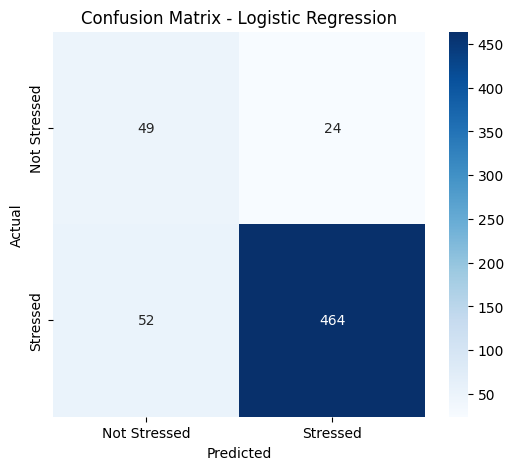


Evaluating SVM...


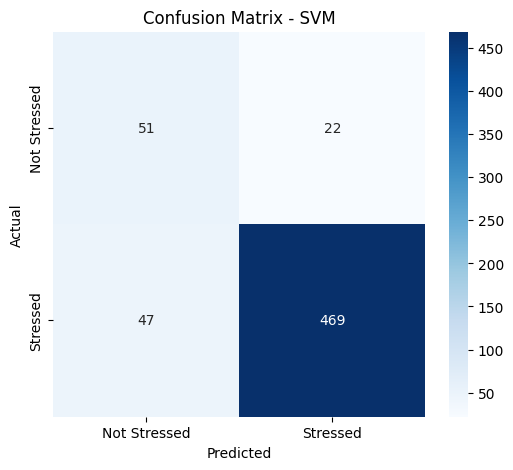


Evaluating Random Forest...


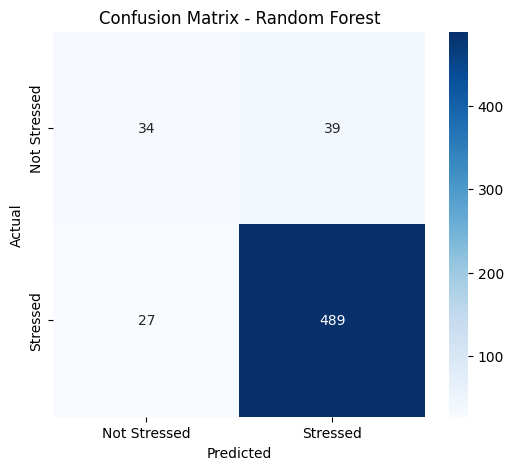


Evaluating AdaBoost...


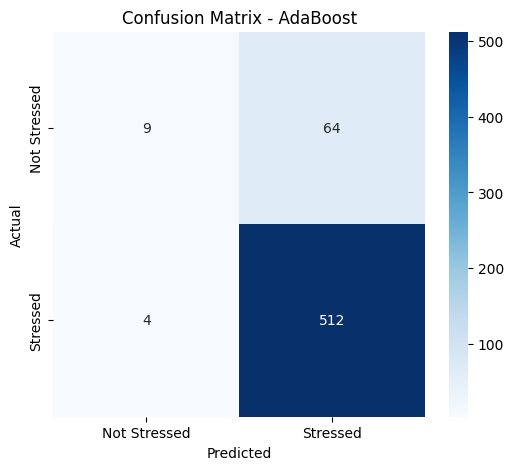


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 1}                   |   0.8768    |     0.871     | 0.871  |  0.8796  |
| 1 |         SVM         |                 {'clf__C': 0.1}                  |   0.8732    |    0.8829     | 0.8829 |   0.89   |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 200} |    0.895    |    0.8879     | 0.8879 |  0.8836  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |   0.8892    |    0.8846     | 0.8846 |  0.8474  |
+---+---------------------+----------------------------------------------

In [ ]:
#Using Tf-IDF
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words) if len(words) > 1 else ''

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

df['cleaned_text'] = df['title'].apply(enhanced_clean_text)
df = df[df['cleaned_text'] != '']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, min_df=2, max_df=0.95)),
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train, y_train)
    best_params = model.best_params_
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Print results summary in a beautiful table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))

### Extract the best SVM estimator directly from GridSearchCV results

In [ ]:
# Extract the best SVM estimator directly from GridSearchCV results
best_svm_pipeline = models['SVM'].best_estimator_

# Predict labels using the best pipeline (TF-IDF + SVM)
mcGill_df['cleaned_text'] = mcGill_df['selftext'].apply(enhanced_clean_text)
mcGill_df['TF_IDF_ِStress_Prediction'] = best_svm_pipeline.predict(mcGill_df['cleaned_text'])

### Applying WROD2VEC TO THE MODEL

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading and preprocessing data...

Evaluating Logistic Regression...


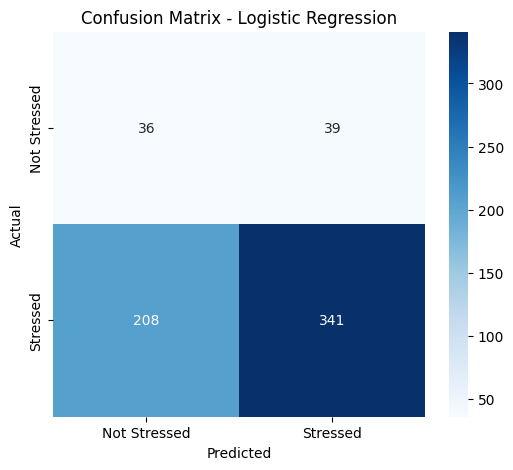


Evaluating SVM...


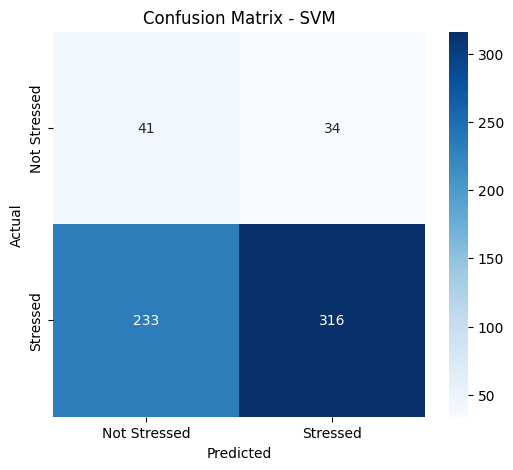


Evaluating Random Forest...


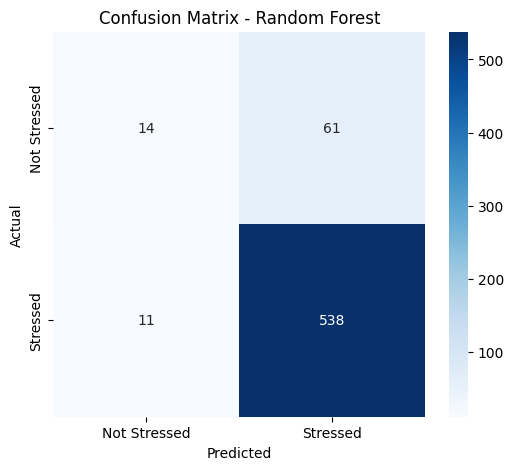


Evaluating AdaBoost...


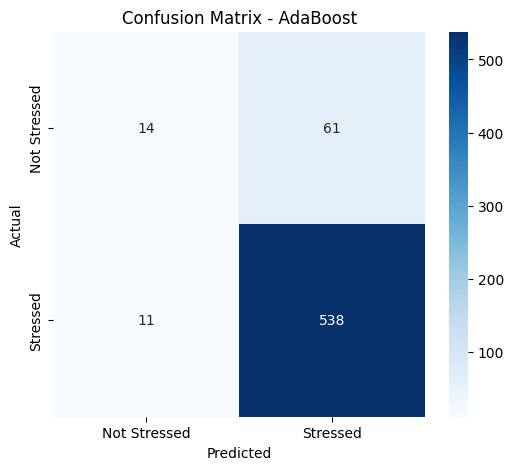


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.5598    |    0.6042     | 0.6042 |  0.673   |
| 1 |         SVM         |                  {'clf__C': 10}                  |   0.2705    |    0.5721     | 0.5721 |  0.6467  |
| 2 |    Random Forest    | {'clf__max_depth': 10, 'clf__n_estimators': 100} |   0.8765    |    0.8846     | 0.8846 |  0.8583  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 100}            |   0.8778    |    0.8846     | 0.8846 |  0.8583  |
+---+---------------------+----------------------------------------------

In [ ]:
#Using word2Vec

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # Return list of words for Word2Vec

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
print("Loading and preprocessing data...")
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_analytics_Proj/Reddit_stress_detection_dataset.csv", sep=',')
df = pd.read_csv("Reddit_stress_detection_dataset.csv", delimiter=';')
df = df[['title','label']]

df['cleaned_text'] = df['title'].apply(enhanced_clean_text)
df = df[df['cleaned_text'].apply(len) > 0]

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)

def get_w2v_embedding(text, model, vector_size=300):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Transform text data using Word2Vec embeddings
X_train_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_train])
X_test_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_test])

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, cv=5, return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, cv=5, return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, cv=5, return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train_w2v, y_train)
    best_params = model.best_params_
    y_pred = model.predict(X_test_w2v)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Print results summary in a beautiful table
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))


Modifications: Use StratifiedKFold: Ensure class distribution remains balanced in cross-validation. Oversampling with SMOTE: Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance. Modify Model Hyperparameters: Adjust models to handle imbalanced data better. Improve Word2Vec Embedding Handling: Normalize embeddings to stabilize performance.

In [ ]:
!pip install imbalanced-learn

### using word2vec + SMOTE for higher evaluation metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Evaluating Logistic Regression...


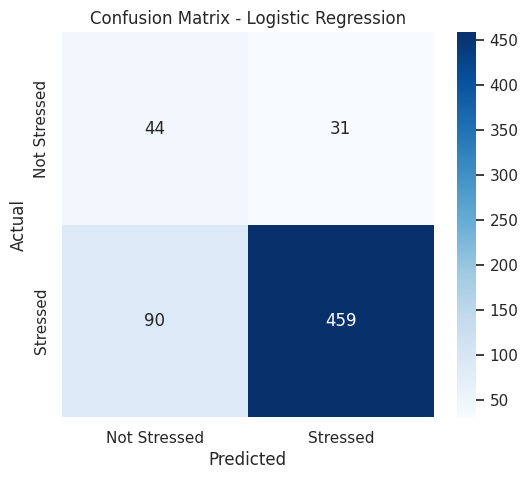


Evaluating SVM...


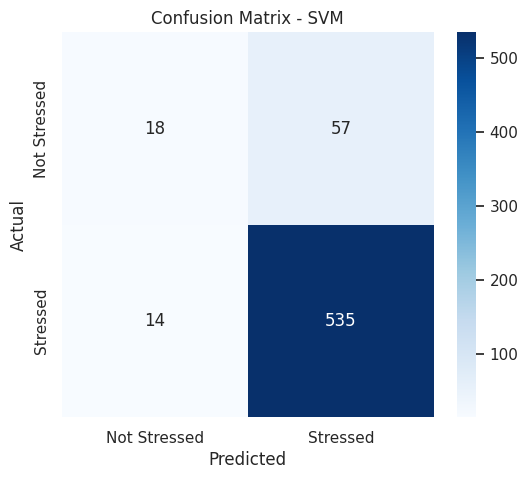


Evaluating Random Forest...


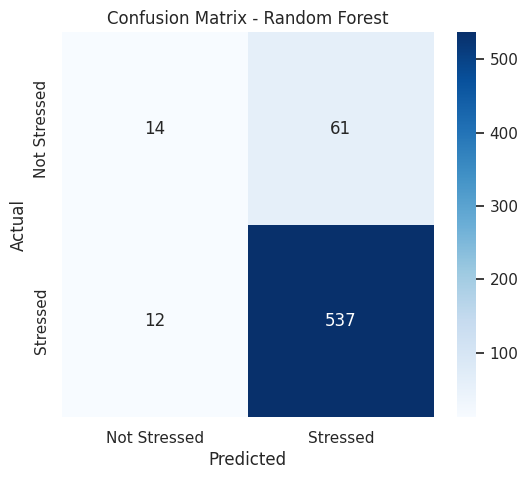


Evaluating AdaBoost...


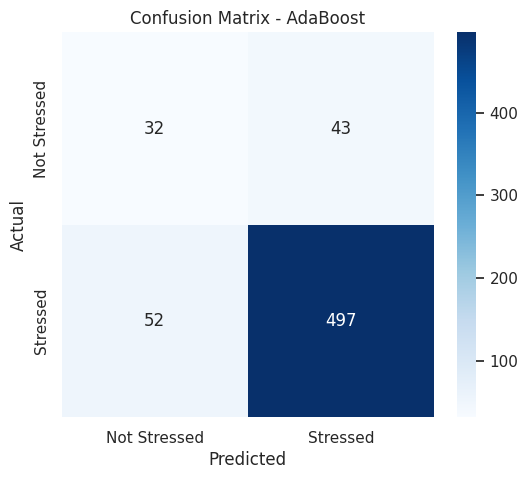


Final Results Summary:
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
|   |        Model        |                 Best Parameters                  | CV Accuracy | Test Accuracy | Recall | F1-Score |
+---+---------------------+--------------------------------------------------+-------------+---------------+--------+----------+
| 0 | Logistic Regression |                  {'clf__C': 10}                  |   0.8373    |    0.8061     | 0.8061 |  0.828   |
| 1 |         SVM         |        {'clf__C': 10, 'clf__gamma': 0.01}        |   0.8145    |    0.8862     | 0.8862 |  0.8655  |
| 2 |    Random Forest    | {'clf__max_depth': 20, 'clf__n_estimators': 200} |   0.9169    |     0.883     | 0.883  |  0.8571  |
| 3 |      AdaBoost       |            {'clf__n_estimators': 200}            |   0.8063    |    0.8478     | 0.8478 |  0.8514  |
+---+---------------------+----------------------------------------------

In [90]:
#using word2vec + SMOTE
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # <-- ADD THIS LINE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Enhanced text preprocessing
def enhanced_clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # Return list of words for Word2Vec

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Load and preprocess data
df = pd.read_csv("Reddit_stress_detection_dataset.csv", delimiter=';')
df = df[['title','label']]
df['cleaned_text'] = df['title'].apply(enhanced_clean_text)
df = df[df['cleaned_text'].apply(len) > 0]

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)

def get_w2v_embedding(text, model, vector_size=300):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Transform text data using Word2Vec embeddings
X_train_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_train])
X_test_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in X_test])

# Handling Class Imbalance with Limited SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42)  # Balance only up to 60% of the majority class
X_train_w2v, y_train = smote.fit_resample(X_train_w2v, y_train)

# Standardization for SVM and Logistic Regression
scaler = StandardScaler()
X_train_w2v = scaler.fit_transform(X_train_w2v)
X_test_w2v = scaler.transform(X_test_w2v)

# Define models with hyperparameter tuning
models = {
    'Logistic Regression': GridSearchCV(Pipeline([
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]), param_grid={'clf__C': [0.1, 1, 10]}, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5), return_train_score=True),

    'SVM': GridSearchCV(Pipeline([
        ('clf', SVC(kernel='rbf', class_weight='balanced', probability=True))
    ]), param_grid={'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 0.01, 0.1, 1]}, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5), return_train_score=True),

    'Random Forest': GridSearchCV(Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]), param_grid={'clf__n_estimators': [100, 200], 'clf__max_depth': [10, 20]}, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5), return_train_score=True),

    'AdaBoost': GridSearchCV(Pipeline([
        ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]), param_grid={'clf__n_estimators': [50, 100, 200]}, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5), return_train_score=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train_w2v, y_train)
    best_params = model.best_params_
    y_pred = model.predict(X_test_w2v)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    plot_confusion_matrix(y_test, y_pred, name)

    results.append({
        'Model': name,
        'Best Parameters': best_params,
        'CV Accuracy': np.mean(model.cv_results_['mean_test_score']),
        'Test Accuracy': accuracy,
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Print results summary
results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(tabulate(results_df.round(4), headers='keys', tablefmt='pretty'))

In [93]:
# Ensure text preprocessing is applied
mcGill_df['cleaned_text'] = mcGill_df['selftext'].apply(enhanced_clean_text)

# Convert text to Word2Vec embeddings
mcGill_w2v = np.array([get_w2v_embedding(text, word2vec_model) for text in mcGill_df['cleaned_text']])

# Extract the best Random Forest estimator
best_rf_pipeline = models['Random Forest'].best_estimator_

# Predict labels using the best Random Forest model
mcGill_df['Word2Vec_Stress_Prediction'] = best_rf_pipeline.predict(mcGill_w2v)

mcGill_df

NameError: name 'mcGill_df' is not defined

In [ ]:

# Save predictions to a new CSV file
output_path = "predicted_McGill.csv"
mcGill_df.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")


Predictions saved to: predicted_McGill.csv


# Read the sentiment version of the mcgill dataset and merge

In [78]:
mcgill_sentiment = pd.read_csv('mcgill_processed_sentiment.csv')
mcgill_sentiment

title  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2799                      How do-able is this schedule?   
2800  Advanced Standing, AP Credits and Being Forced...   
2801                                     Quebec Tuition   
2802                                     Your thoughts?   
2803  McGill Administration disregards student refer...   

                                               selftext  created_utc  upvotes  \
0     Hi, I spend a lot of time in the campus and I ...   1737599530        9   
1     [https://www.mcgill.ca/study/2024-2025/univers...   1737598116        2   
2     I’ve contacted them through email and through ...   1737584212        6   
3     The Biosignals and Systems Analysis Lab at McG...   1737577903       22   
4     How and when do we apply to get our graduation...   1737574561        4   
...                                                 ...          ...      ...   
2799  Hey everyone! So I'm going to be attending McG...   1338901904        1   
2800  Hey guys. I'll be attending mcgill for commerc...   1338055104        0   
2801  Well, I'm a student from Ontario going into U2...   1337907353        0   
2802  I came here because, well, this is McGill.  Th...   1335448474        0   
2803  In a joint letter to CKUT and QPIRG McGill, th...   1326559088        0   

                                                    url  num_comments  \
0     https://www.reddit.com/r/mcgill/comments/1i7t6...             8   
1     https://www.reddit.com/r/mcgill/comments/1i7sp...             8   
2     https://www.reddit.com/r/mcgill/comments/1i7nn...             0   
3     https://www.reddit.com/r/mcgill/comments/1i7l5...             2   
4     https://www.reddit.com/r/mcgill/comments/1i7jr...             1   
...                                                 ...           ...   
2799  https://www.reddit.com/r/mcgill/comments/um0fy...            15   
2800  https://www.reddit.com/r/mcgill/comments/u67l7...             7   
2801  https://www.reddit.com/r/mcgill/comments/u3p5s...            11   
2802  https://www.reddit.com/r/mcgill/comments/stjo6...             9   
2803  https://www.reddit.com/r/mcgill/comments/ogvdv...             7   

                 author  post_id created_readable  \
0     franticpizzaeater  1i7t6ep   1/23/2025 2:32   
1              PowerZox  1i7spkt   1/23/2025 2:08   
2          chocolover28  1i7nniv  1/22/2025 22:16   
3             biosigsys  1i7l57g  1/22/2025 20:31   
4        Other-Link4919  1i7jrw2  1/22/2025 19:36   
...                 ...      ...              ...   
2799         jokeofweek    um0fy   6/5/2012 13:11   
2800            duykur1    u67l7  5/26/2012 17:58   
2801   RitalIN-RitalOUT    u3p5s   5/25/2012 0:55   
2802  yawnlikeyoumeanit    stjo6  4/26/2012 13:54   
2803            ruoraze    ogvdv  1/14/2012 16:38   

                                          cleaned_title  \
0                             microwave facility campus   
1        faculty engineering regulation calculator best   
2                  mcgill bookstore support ever answer   
3     seeking several participant brain imaging stud...   
4                                    graduation picture   
...                                                 ...   
2799                                    doable schedule   
2800     advanced standing ap credit forced u1 question   
2801                                     quebec tuition   
2802                                            thought   
2803  mcgill administration disregard student refere...   

                                       cleaned_selftext title_sentiment_label  \
0     hi spend lot time campus wondering microwaving...         

In [94]:
mcgill_sentiment = pd.read_csv('mcgill_processed_sentiment.csv')
mcgill_lebeled = pd.read_csv('predicted_McGill.csv')

#Merge the mcgill_Df which has the labels with the sentiment version
mcgill_results = pd.merge(mcgill_lebeled, mcgill_sentiment, on='url')
mcgill_results

title_x  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2587                       How doable is this schedule?   
2588  Advanced Standing, AP Credits and Being Forced...   
2589                                     Quebec Tuition   
2590                                     Your thoughts?   
2591  McGill Administration disregards student refer...   

                                             selftext_x  created_utc_x  \
0     Hi, I spend a lot of time in the campus and I ...   1.737600e+09   
1     httpswww.mcgill.castudy20242025universityregul...   1.737598e+09   
2     Ive contacted them through email and through t...   1.737584e+09   
3     The Biosignals and Systems Analysis Lab at McG...   1.737578e+09   
4     How and when do we apply to get our graduation...   1.737575e+09   
...                                                 ...            ...   
2587  Hey everyone! So Im going to be attending McGi...   1.338902e+09   
2588  Hey guys. Ill be attending mcgill for commerce...   1.338055e+09   
2589  Well, Im a student from Ontario going into U2 ...   1.337907e+09   
2590  I came here because, well, this is McGill.  Th...   1.335448e+09   
2591  In a joint letter to CKUT and QPIRG McGill, th...   1.326559e+09   

      upvotes_x                                                url  \
0             9  https://www.reddit.com/r/mcgill/comments/1i7t6...   
1             2  https://www.reddit.com/r/mcgill/comments/1i7sp...   
2             6  https://www.reddit.com/r/mcgill/comments/1i7nn...   
3            22  https://www.reddit.com/r/mcgill/comments/1i7l5...   
4             4  https://www.reddit.com/r/mcgill/comments/1i7jr...   
...         ...                                                ...   
2587          1  https://www.reddit.com/r/mcgill/comments/um0fy...   
2588          0  https://www.reddit.com/r/mcgill/comments/u67l7...   
2589          0  https://www.reddit.com/r/mcgill/comments/u3p5s...   
2590          0  https://www.reddit.com/r/mcgill/comments/stjo6...   
2591          0  https://www.reddit.com/r/mcgill/comments/ogvdv...   

      num_comments_x           author_x post_id_x   created_readable_x  \
0                  8  franticpizzaeater   1i7t6ep  2025-01-23 02:32:10   
1                  8           PowerZox   1i7spkt  2025-01-23 02:08:36   
2                  0       chocolover28   1i7nniv  2025-01-22 22:16:52   
3                  2          biosigsys   1i7l57g  2025-01-22 20:31:43   
4                  1     Other-Link4919   1i7jrw2  2025-01-22 19:36:01   
...              ...                ...       ...                  ...   
2587              15         jokeofweek     um0fy  2012-06-05 13:11:44   
2588               7            duykur1     u67l7  2012-05-26 17:58:24   
2589              11   RitalIN-RitalOUT     u3p5s  2012-05-25 00:55:53   
2590               9  yawnlikeyoumeanit     stjo6  2012-04-26 13:54:34   
2591               7            ruoraze     ogvdv  2012-01-14 16:38:08   

                                           cleaned_text  ...  created_utc_y  \
0     ['hi', 'spend', 'lot', 'time', 'campus', 'wond...  ...     1737599530   
1     ['best', 'computer', 'engineering?', 'seem', '...  ...     1737598116   
2     ['ive', 'contacted', 'email', 'contact', 'form...  ...     1737584212   
3     ['biosignals', 'systems', 'analysis', 'lab', '...  ...     1737577903   
4     ['apply', 'get', 'graduation', 'pictures?', 'i...  ...     1737574561   
...                                                 ...  ...            ...   
2587  ['hey', 'everyone!', 'im', 'going', 'attending...  ...     1338901904   
2588  ['hey', 'guys.', 'ill', 'attending', 'mcgill',...  ...     1338055104   
2589  ['w

In [95]:
mcgill_results.columns

#Keep relevant columns
useful_cols = ['title_x', 'selftext','TF_IDF_ِDepression_Prediction',
       'Word2Vec_Depression_Prediction', 'cleaned_title', 'cleaned_selftext',
       'title_sentiment_label', 'selftext_sentiment_label']
mcgill_results = mcgill_results[useful_cols]
mcgill_results

KeyError: "['selftext'] not in index"

In [ ]:
import pandas as pd

# Load the dataset
file_path = "predicted_McGill.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)
df.columns

In [ ]:
# Define the four label columns
label_columns = [
    "TF_IDF_ِDepression_Prediction",
    "Word2Vec_Depression_Prediction",
    "TF_IDF_ِStress_Prediction",
    "Word2Vec_Stress_Prediction"
]

# Count how many times each label is 1
label_counts = df[label_columns].sum()

# Count how many rows have more than 1 label set to 1
multi_label_rows = (df[label_columns].sum(axis=1) > 1).sum()

# Count how many rows have all 4 labels as 1
all_four_labels = (df[label_columns].sum(axis=1) == 4).sum()

# Display results
print("Count of 1s for each label:")
print(label_counts)
print("\nNumber of rows with more than 1 label:", multi_label_rows)
print("Number of rows where all 4 labels are 1:", all_four_labels)

In [ ]:
#write a code to get the average of ratio of TF_IDF to Word2Vec labels

import numpy as np

result = np.average([1100 / 870, 1134 / 695])
print(result)

In [ ]:
import pandas as pd
from itertools import combinations

# Load the dataset
file_path = "predicted_McGill.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Define the four label columns
label_columns = [
    "TF_IDF_ِDepression_Prediction",
    "Word2Vec_Depression_Prediction",
    "TF_IDF_ِStress_Prediction",
    "Word2Vec_Stress_Prediction"
]

# Compute pairwise similarity (how many times both models predicted 1 for the same row)
pairwise_similarity = {}

for col1, col2 in combinations(label_columns, 2):
    similarity_count = ((df[col1] == 1) & (df[col2] == 1)).sum()
    pairwise_similarity[(col1, col2)] = similarity_count

# Find the pair with the highest similarity
most_similar_pair = max(pairwise_similarity, key=pairwise_similarity.get)
highest_similarity_count = pairwise_similarity[most_similar_pair]

# Display results
print("Pairwise similarity (shared 1s):")
for pair, count in pairwise_similarity.items():
    print(f"{pair}: {count}")

print("\nThe most similar models are:", most_similar_pair)
print("They classified", highest_similarity_count, "messages the same (both as 1).")

## APPLYING ADVANCED SENTIMENT ANALYSIS

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Title Sentiment Distribution:
title_sentiment_label
Neutral     1830
Positive     510
Negative     464
Name: count, dtype: int64

Selftext Sentiment Distribution:
selftext_sentiment_label
Positive    1722
Negative     715
Neutral      367
Name: count, dtype: int64


<ipython-input-20-532f02094c94>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["title_sentiment_label"], palette="coolwarm")
<ipython-input-20-532f02094c94>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["selftext_sentiment_label"], palette="coolwarm")


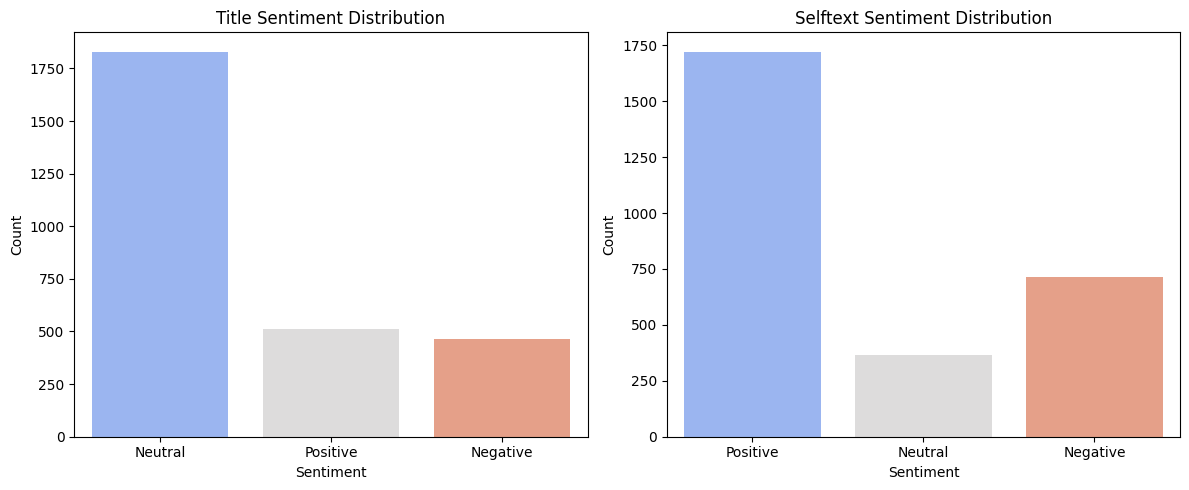

In [ ]:
df = pd.read_csv("mcgill_complete_dataset (1).csv")

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required NLTK resources are downloaded
nltk.download("vader_lexicon")

# Load dataset
df = pd.read_csv("mcgill_complete_dataset (1).csv")

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to preprocess text (keeping emojis and punctuation for VADER)
def preprocess_text_vader(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase, remove extra spaces
        return text
    return ""

# Apply preprocessing
df["title_clean"] = df["title"].apply(preprocess_text_vader)
df["selftext_clean"] = df["selftext"].apply(preprocess_text_vader)

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply VADER Sentiment Analysis
df["title_sentiment"] = df["title_clean"].apply(get_sentiment_scores)
df["selftext_sentiment"] = df["selftext_clean"].apply(get_sentiment_scores)

# Extract individual sentiment scores
df["title_compound"] = df["title_sentiment"].apply(lambda x: x["compound"])
df["title_positive"] = df["title_sentiment"].apply(lambda x: x["pos"])
df["title_negative"] = df["title_sentiment"].apply(lambda x: x["neg"])
df["title_neutral"] = df["title_sentiment"].apply(lambda x: x["neu"])

df["selftext_compound"] = df["selftext_sentiment"].apply(lambda x: x["compound"])
df["selftext_positive"] = df["selftext_sentiment"].apply(lambda x: x["pos"])
df["selftext_negative"] = df["selftext_sentiment"].apply(lambda x: x["neg"])
df["selftext_neutral"] = df["selftext_sentiment"].apply(lambda x: x["neu"])

# Categorize sentiment based on compound score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["title_sentiment_label"] = df["title_compound"].apply(categorize_sentiment)
df["selftext_sentiment_label"] = df["selftext_compound"].apply(categorize_sentiment)

# Display sentiment distribution
print("\nTitle Sentiment Distribution:")
print(df["title_sentiment_label"].value_counts())

print("\nSelftext Sentiment Distribution:")
print(df["selftext_sentiment_label"].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df["title_sentiment_label"], palette="coolwarm")
plt.title("Title Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=df["selftext_sentiment_label"], palette="coolwarm")
plt.title("Selftext Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['title', 'selftext', 'created_utc', 'upvotes', 'url', 'num_comments',
       'author', 'post_id', 'created_readable', 'title_clean',
       'selftext_clean', 'title_sentiment', 'selftext_sentiment',
       'title_compound', 'title_positive', 'title_negative', 'title_neutral',
       'selftext_compound', 'selftext_positive', 'selftext_negative',
       'selftext_neutral', 'title_sentiment_label',
       'selftext_sentiment_label'],
      dtype='object')


In [ ]:
# Select all original columns + sentiment labels
df_sentiment_mapped = df.copy()  # Keep all original data
df_sentiment_mapped["title_sentiment_label"] = df["title_sentiment_label"]
df_sentiment_mapped["selftext_sentiment_label"] = df["selftext_sentiment_label"]

# Save to CSV
df_sentiment_mapped.to_csv("mcgill_sentiment_mapped.csv", index=False)

In [ ]:
import nltk
nltk.data.path.append("/usr/local/nltk_data")
nltk.download("punkt", force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
import shutil
nltk_data_path = "/root/nltk_data"
shutil.rmtree(nltk_data_path, ignore_errors=True)  # Delete the corrupted directory
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])  # Should print first 10 stopwords if installed


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from collections import Counter
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
nltk_stopwords = set(stopwords.words("english"))
custom_stopwords = nltk_stopwords.union(set([
    "mcgill", "wa", "ha", "like", "know", "would", "get", "dont", "people",
    "anyone", "one", "time", "really", "also", "year", "take", "students",
    "make", "think", "look", "could", "im", "ive"
]))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text (lowercasing, removing unnecessary symbols, stopwords, and lemmatizing)
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase and remove extra spaces
        text = re.sub(r'[^\w\s]', '', text)  # Removes all punctuation
       # text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)  # Keep meaningful punctuation
        words = word_tokenize(text)  # Tokenize
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Remove stopwords and lemmatize
        return " ".join(words)
    return ""

# Apply preprocessing to the text
df["title_clean"] = df["title_clean"].apply(preprocess_text)
df["selftext_clean"] = df["selftext_clean"].apply(preprocess_text)

# Extract words from titles & selftext based on sentiment
positive_titles = " ".join(df[df["title_sentiment_label"] == "Positive"]["title_clean"]).split()
negative_titles = " ".join(df[df["title_sentiment_label"] == "Negative"]["title_clean"]).split()

positive_selftext = " ".join(df[df["selftext_sentiment_label"] == "Positive"]["selftext_clean"]).split()
negative_selftext = " ".join(df[df["selftext_sentiment_label"] == "Negative"]["selftext_clean"]).split()

# Count word frequency
pos_title_counts = Counter(positive_titles)
neg_title_counts = Counter(negative_titles)

pos_selftext_counts = Counter(positive_selftext)
neg_selftext_counts = Counter(negative_selftext)

# Convert to DataFrames for visualization
pos_title_df = pd.DataFrame(pos_title_counts.most_common(20), columns=["Word", "Count"])
neg_title_df = pd.DataFrame(neg_title_counts.most_common(20), columns=["Word", "Count"])

pos_selftext_df = pd.DataFrame(pos_selftext_counts.most_common(20), columns=["Word", "Count"])
neg_selftext_df = pd.DataFrame(neg_selftext_counts.most_common(20), columns=["Word", "Count"])

# Display results
print("Top 20 Words in Positive Titles:")
display(pos_title_df)

print("\nTop 20 Words in Negative Titles:")
display(neg_title_df)

print("\nTop 20 Words in Positive Selftext:")
display(pos_selftext_df)

print("\nTop 20 Words in Negative Selftext:")
display(neg_selftext_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 20 Words in Positive Titles:


Word  Count
0       help     41
1     course     32
2       good     31
3     please     24
4       free     23
5     friend     21
6    student     20
7       best     19
8      class     17
9     credit     17
10    honour     17
11      news     16
12      exam     16
13  semester     16
14    monday     15
15      easy     15
16      need     14
17    campus     13
18      want     12
19      prof     11


Top 20 Words in Negative Titles:


Word  Count
0     strike     31
1         ta     25
2      class     21
3       exam     21
4      final     20
5     course     16
6       rant     15
7       lost     14
8   semester     14
9       else     14
10      hard     13
11      math     13
12    failed     13
13      stop     12
14     grade     11
15      ssmu     11
16      feel     10
17     first      9
18       gpa      9
19   failing      9


Top 20 Words in Positive Selftext:


Word  Count
0     course    730
1      class    663
2    student    426
3       want    397
4       much    333
5   semester    332
6       even    318
7       feel    314
8         go    313
9      final    305
10      good    299
11      help    283
12      need    281
13    thanks    279
14      exam    279
15     going    266
16    friend    261
17      work    258
18         u    251
19    school    250


Top 20 Words in Negative Selftext:


Word  Count
0        class    307
1       course    237
2         even    180
3      student    170
4         exam    164
5         feel    161
6        grade    145
7         want    141
8        still    138
9           go    135
10       final    134
11    semester    132
12        need    124
13         day    124
14         got    120
15       first    119
16       going    117
17           u    109
18        last    105
19  university    100

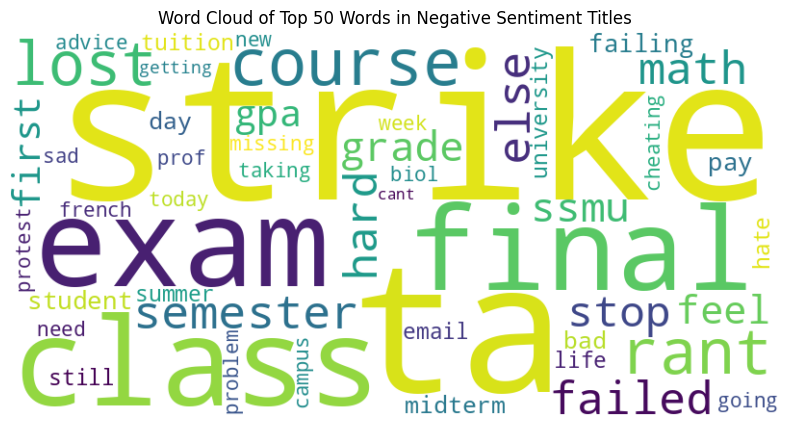

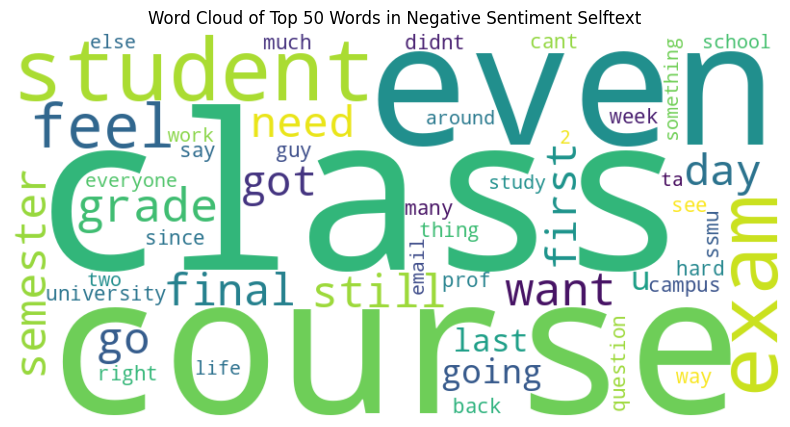

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Get the top 50 most frequent words in negative sentiment titles
top_50_neg_title_words = dict(Counter(negative_titles).most_common(50))
neg_title_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_50_neg_title_words)

plt.figure(figsize=(10, 5))
plt.imshow(neg_title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 50 Words in Negative Sentiment Titles")
plt.show()

# Get the top 50 most frequent words in negative sentiment selftext
top_50_neg_selftext_words = dict(Counter(negative_selftext).most_common(50))
neg_selftext_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_50_neg_selftext_words)

plt.figure(figsize=(10, 5))
plt.imshow(neg_selftext_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 50 Words in Negative Sentiment Selftext")
plt.show()


NOTES ON WORD FREQUENCY & SENTIMENTS
Positive Titles: Students seek help, recommendations (best, easy), and resources (free, credit, honour). Interest in events & updates (news, monday, campus).

Positive Selftext: Engagement in social & academic discussions (help, thanks, friend, feel, everyone). Optimistic tone: need, going, good, much, work, want. Seeking or offering assistance.

NEGATIVE Negative Titles: Major concerns: strike, rant, lost, failed, stop. Academic stress: exam, final, class, grade, math, gpa. Issues with semester, course management, and TA/SSMU-related frustrations.

Negative Selftext: Academic struggles: exam, grade, final, semester, university. Emotional stress: feel, still, last, need, want. Workload/performance issues: going, got, first, day.

<ipython-input-34-fd094c4faa97>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="title_sentiment_label", y="upvotes", data=df, palette="coolwarm")


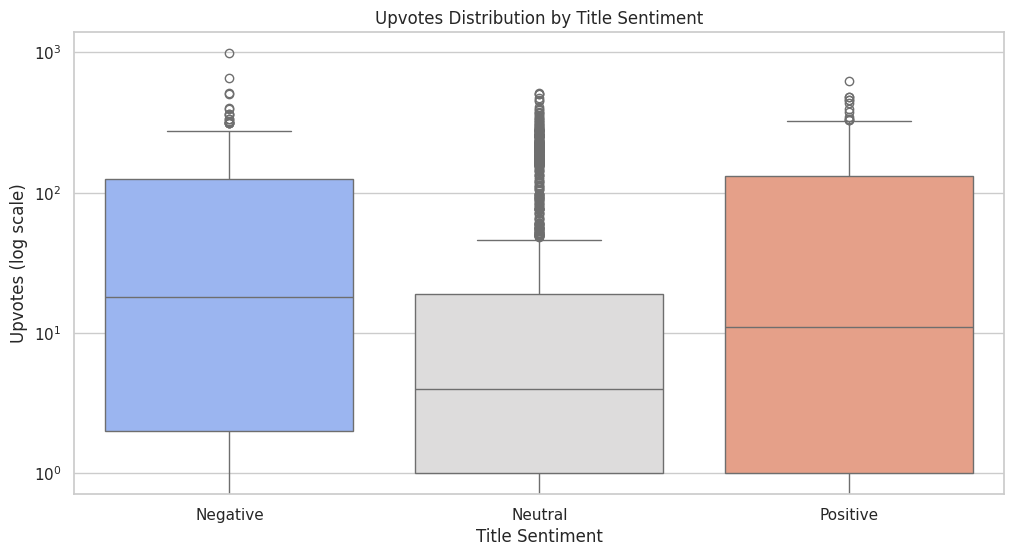

<ipython-input-34-fd094c4faa97>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="title_sentiment_label", y="num_comments", data=df, palette="coolwarm")


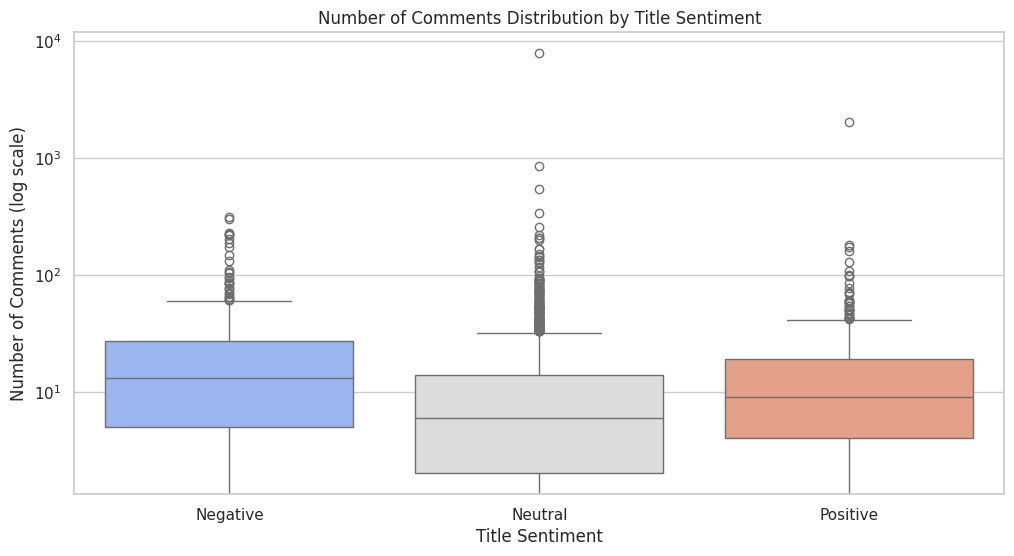

<ipython-input-34-fd094c4faa97>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="title_sentiment_label", y="title_length", data=df, palette="coolwarm")


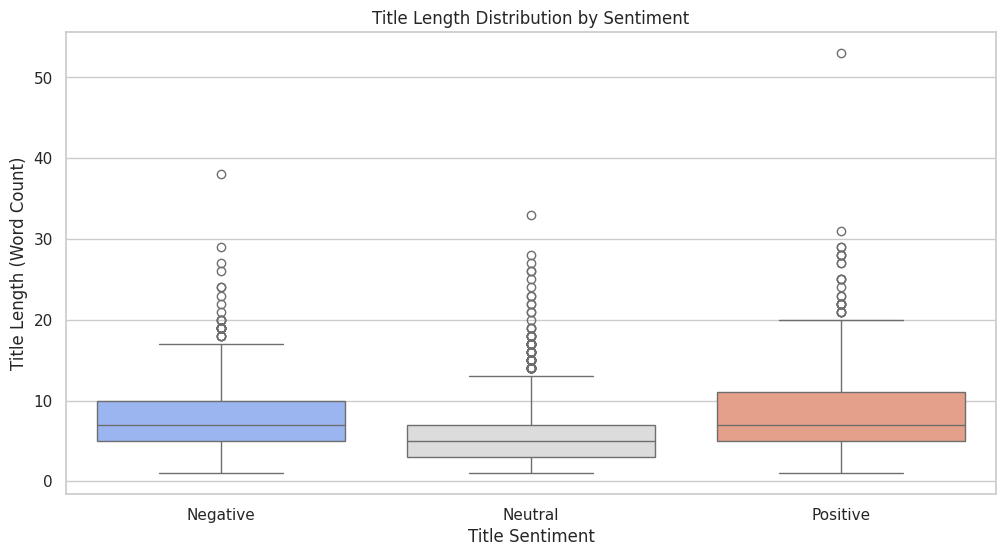

<ipython-input-34-fd094c4faa97>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="selftext_sentiment_label", y="text_length", data=df, palette="coolwarm")


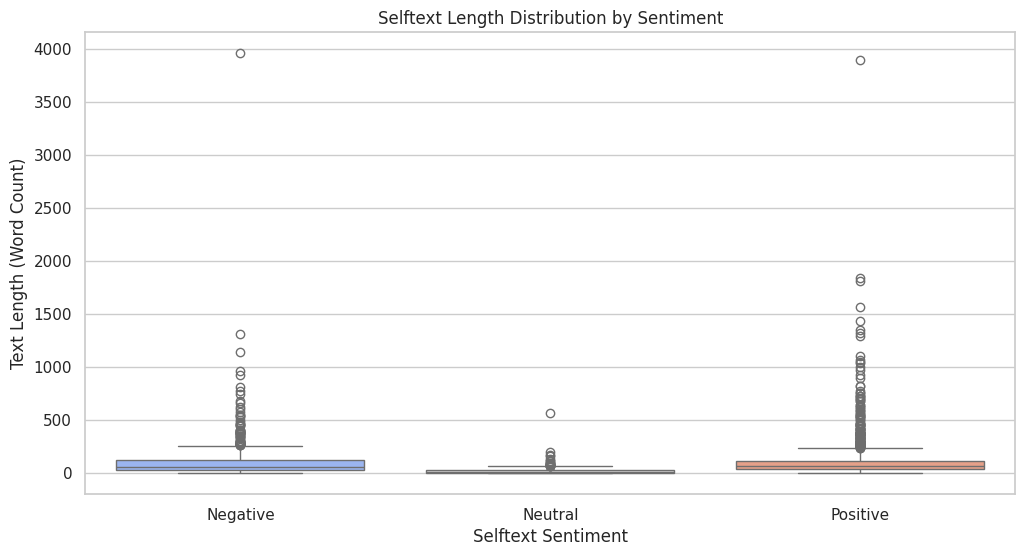

In [ ]:

df["title_length"] = df["title"].apply(lambda x: len(str(x).split()))
df["text_length"] = df["selftext"].apply(lambda x: len(str(x).split()))

# Convert sentiment labels to categorical for plotting
sentiment_order = ["Negative", "Neutral", "Positive"]
df["title_sentiment_label"] = pd.Categorical(df["title_sentiment_label"], categories=sentiment_order, ordered=True)
df["selftext_sentiment_label"] = pd.Categorical(df["selftext_sentiment_label"], categories=sentiment_order, ordered=True)


sns.set(style="whitegrid")

### 1. Upvotes vs. Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x="title_sentiment_label", y="upvotes", data=df, palette="coolwarm")
plt.yscale("log")  # Log scale for better visualization
plt.title("Upvotes Distribution by Title Sentiment")
plt.xlabel("Title Sentiment")
plt.ylabel("Upvotes (log scale)")
plt.show()

### 2. Number of Comments vs. Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x="title_sentiment_label", y="num_comments", data=df, palette="coolwarm")
plt.yscale("log")
plt.title("Number of Comments Distribution by Title Sentiment")
plt.xlabel("Title Sentiment")
plt.ylabel("Number of Comments (log scale)")
plt.show()

### 3. Title Length vs. Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x="title_sentiment_label", y="title_length", data=df, palette="coolwarm")
plt.title("Title Length Distribution by Sentiment")
plt.xlabel("Title Sentiment")
plt.ylabel("Title Length (Word Count)")
plt.show()

### 4. Text Length vs. Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x="selftext_sentiment_label", y="text_length", data=df, palette="coolwarm")
plt.title("Selftext Length Distribution by Sentiment")
plt.xlabel("Selftext Sentiment")
plt.ylabel("Text Length (Word Count)")
plt.show()

<ipython-input-35-9385a7fcfbe9>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_sentiment = df.groupby(["year", "title_sentiment_label"]).size().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

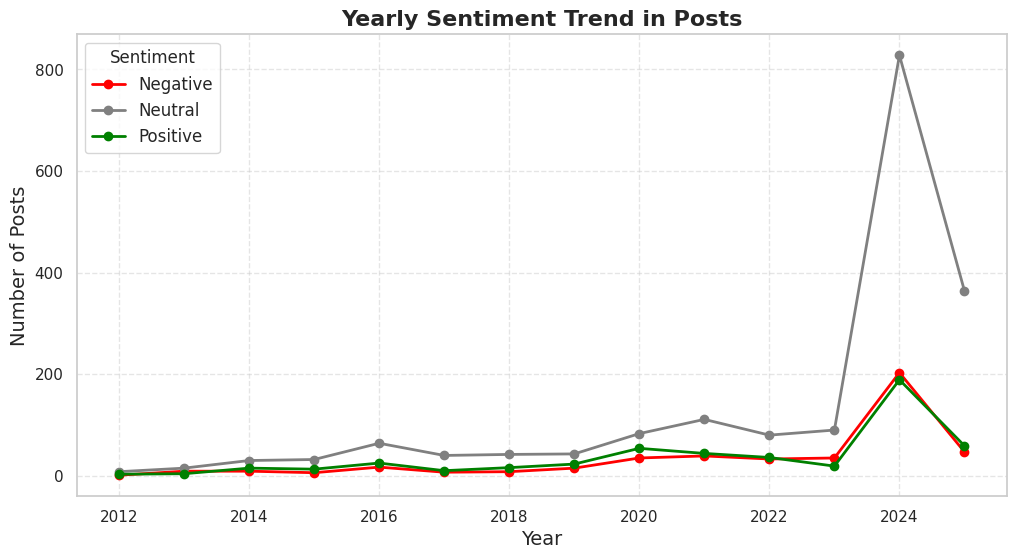

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'created_utc' to datetime format if not already done
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

# Extract year, month, and day of week for aggregation
df["year"] = df["created_utc"].dt.year
df["month"] = df["created_utc"].dt.month
df["day_of_week"] = df["created_utc"].dt.dayofweek  # 0=Monday, 6=Sunday

### **Yearly Sentiment Trend**
yearly_sentiment = df.groupby(["year", "title_sentiment_label"]).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
yearly_sentiment.plot(kind="line", marker="o", color=["red", "gray", "green"], linewidth=2, figsize=(12,6))
plt.title("Yearly Sentiment Trend in Posts", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.legend(title="Sentiment", labels=["Negative", "Neutral", "Positive"], fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


<ipython-input-36-33865b224ef9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sentiment = df.groupby(["day_of_week", "title_sentiment_label"]).size().unstack().fillna(0)


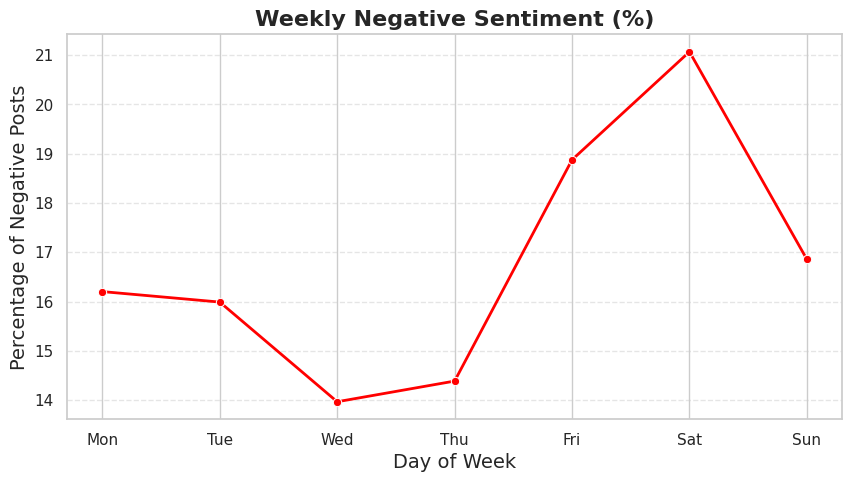

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Weekly Sentiment Breakdown (Only % Negative)
weekly_sentiment = df.groupby(["day_of_week", "title_sentiment_label"]).size().unstack().fillna(0)

# Convert to percentage
weekly_sentiment_percentage = weekly_sentiment.div(weekly_sentiment.sum(axis=1), axis=0) * 100

# Plot using a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_sentiment_percentage.index, y=weekly_sentiment_percentage["Negative"], marker="o", color="red", linewidth=2)

# Customize plot
plt.title("Weekly Negative Sentiment (%)", fontsize=16, fontweight="bold")
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Percentage of Negative Posts", fontsize=14)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()

<ipython-input-38-41e92c178ce0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sentiment = df.groupby(["day_of_week", "title_sentiment_label"]).size().unstack().fillna(0)


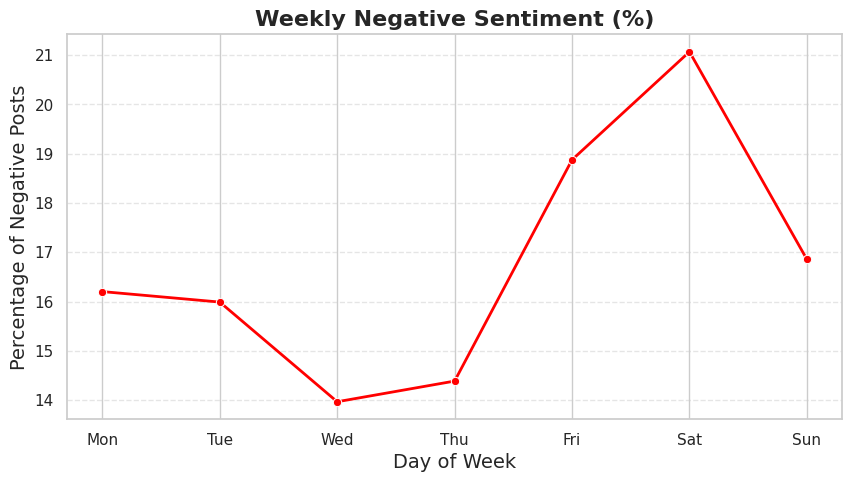

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Weekly Sentiment Breakdown (Only % Negative)
weekly_sentiment = df.groupby(["day_of_week", "title_sentiment_label"]).size().unstack().fillna(0)

# Convert to percentage
weekly_sentiment_percentage = weekly_sentiment.div(weekly_sentiment.sum(axis=1), axis=0) * 100

# Ensure the index is sorted correctly
weekly_sentiment_percentage = weekly_sentiment_percentage.sort_index()

# Plot using a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_sentiment_percentage.index, y=weekly_sentiment_percentage["Negative"], marker="o", color="red", linewidth=2)

# Customize plot
plt.title("Weekly Negative Sentiment (%)", fontsize=16, fontweight="bold")
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Percentage of Negative Posts", fontsize=14)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import nltk
import re
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")



# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase and remove extra spaces
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
        words = word_tokenize(text)  # Tokenize
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Remove stopwords & lemmatize
        return words
    return []

# Filter dataset for negative sentiment posts
df_negative = df[df["selftext_sentiment_label"] == "Negative"].copy()

# Apply preprocessing to the text
df_negative["processed_text"] = df_negative["selftext"].apply(preprocess_text)

# Create dictionary & corpus for LDA
dictionary = corpora.Dictionary(df_negative["processed_text"])
corpus = [dictionary.doc2bow(text) for text in df_negative["processed_text"]]

# Train LDA Model
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Display Topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx+1}: {topic}")

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_negative["processed_text"], dictionary=dictionary, coherence="c_v")
coherence_score = coherence_model_lda.get_coherence()
print(f"\nLDA Model Coherence Score: {coherence_score:.4f}")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 1: 0.013*"class" + 0.008*"feel" + 0.006*"semester" + 0.006*"course" + 0.005*"even" + 0.004*"thing" + 0.004*"student" + 0.004*"grade" + 0.004*"covid" + 0.004*"lecture"
Topic 2: 0.004*"student" + 0.004*"guy" + 0.004*"still" + 0.004*"case" + 0.004*"u" + 0.004*"see" + 0.004*"even" + 0.003*"day" + 0.003*"ssmu" + 0.003*"going"
Topic 3: 0.006*"student" + 0.005*"first" + 0.004*"lettuce" + 0.003*"allowed" + 0.003*"may" + 0.003*"guy" + 0.003*"class" + 0.003*"cap" + 0.003*"go" + 0.003*"need"
Topic 4: 0.011*"course" + 0.011*"class" + 0.009*"exam" + 0.008*"final" + 0.008*"grade" + 0.005*"still" + 0.005*"even" + 0.005*"got" + 0.005*"go" + 0.004*"day"
Topic 5: 0.008*"de" + 0.004*"want" + 0.004*"le" + 0.004*"even" + 0.003*"feel" + 0.003*"right" + 0.003*"cant" + 0.003*"start" + 0.003*"last" + 0.003*"still"

LDA Model Coherence Score: 0.3898


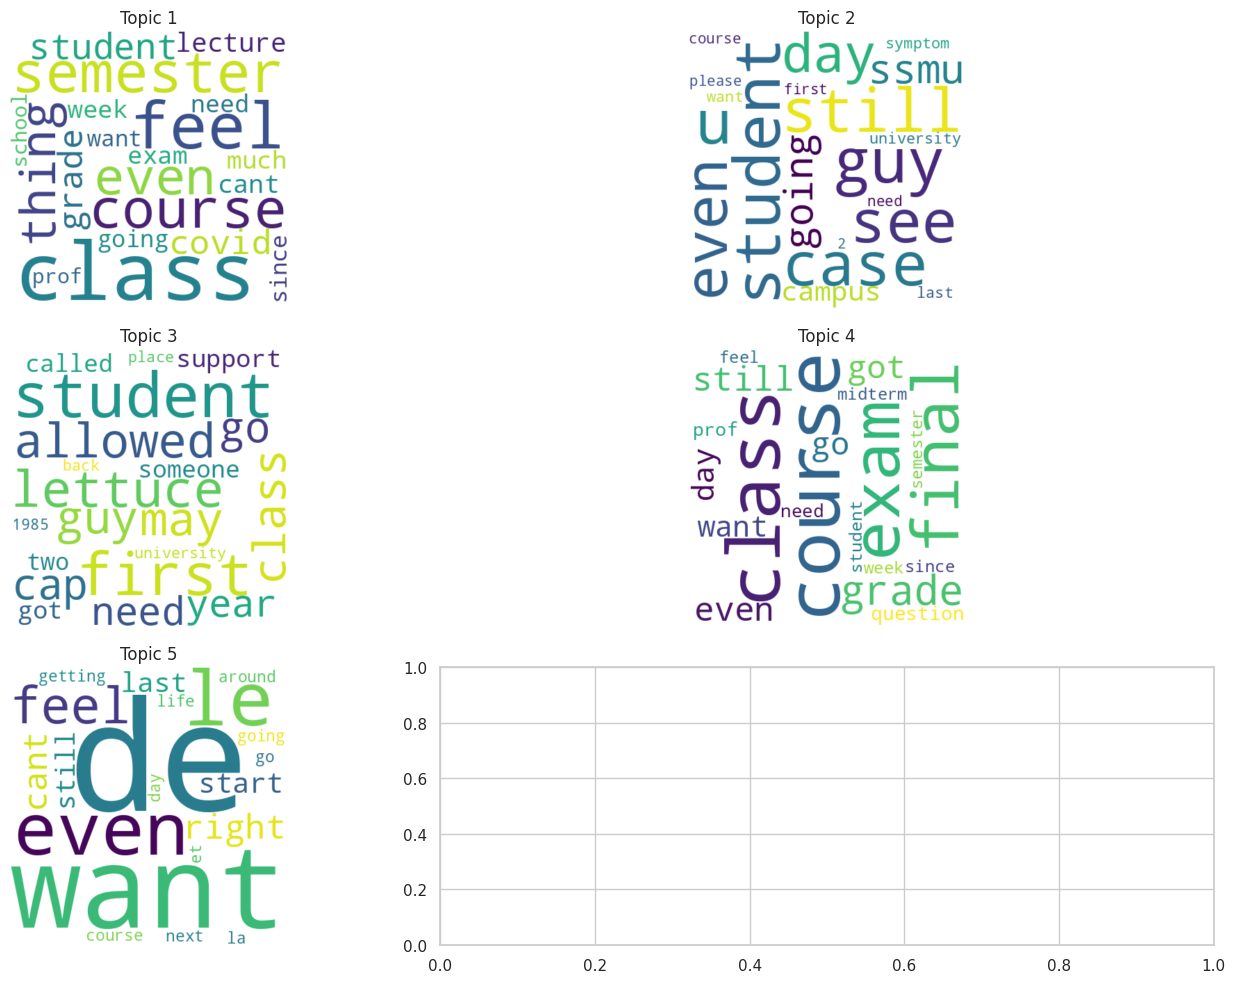

In [ ]:
# Generate Word Clouds for Topics
cols = 2
rows = (num_topics // cols) + 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_topics):
    words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(words)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i+1}")

plt.tight_layout()
plt.show()

# LDA NOTES
Topic 1: Words like class, semester, student, grade, feel suggest academic concerns.
Topic 2: Words like still, see, case, student might indicate discussions around ongoing issues or complaints.
Topic 3: Words like need, allowed, first, student could be related to policies or permissions.
Topic 4: Words like exam, final, class, course indicate a focus on assessments and coursework stress.
Topic 5: Words like want, feel, even, right suggest emotional or personal concerns.
Key Takeaways:
The negative sentiment posts mainly revolve around academics, exams, grading, student experiences, and policies.

# ADVANCED VISAULIZATION AFTER MODELING

In [ ]:
from nltk.stem import WordNetLemmatizer
!pip install gensim

In [ ]:
import pandas as pd
import nltk
import re
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Additional custom stopwords specific to the dataset
custom_stopwords = nltk_stopwords.union(set([
    "mcgill", "wa", "ha", "like", "know", "would", "get", "dont", "people",
    "anyone", "one", "time", "really", "also", "year", "take", "students",
    "make", "think", "look", "could", "im", "ive", "le", "la", "de"
]))

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase and remove extra spaces
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
        words = word_tokenize(text)  # Tokenize
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Remove stopwords & lemmatize
        return words
    return []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
mcgill_sentiment = pd.read_csv('mcgill_sentiment_mapped.csv')
mcgill_lebeled = pd.read_csv('predicted_McGill.csv')

#Merge the mcgill_Df which has the labels with the sentiment version
mcgill_results = pd.merge(mcgill_lebeled, mcgill_sentiment, on='url')
mcgill_results
# Save to CSV
mcgill_results.to_excel("predicted_McGill.xlsx", index=False)
print('mcgill file exported')
#mcgill_results.to_excel("predicted_McGill.xlsx", index=False)

mcgill file exported


In [ ]:

columns_to_keep = [1, 2, 5, 11, 12, 13, 14, 35, 36]
columns_to_keep = [i - 1 for i in columns_to_keep]  # Adjust if 1-based indexing

mcgill_consolidated = mcgill_results.iloc[:, columns_to_keep]  # Use .iloc
mcgill_consolidated

title_x  \
0                         Microwave facility on campus?   
1     Which Faculty of Engineering regulation calcul...   
2      Does the McGill Bookstore support ever answer ??   
3     Seeking several more participants for brain im...   
4                                   Graduation Pictures   
...                                                 ...   
2587                       How doable is this schedule?   
2588  Advanced Standing, AP Credits and Being Forced...   
2589                                     Quebec Tuition   
2590                                     Your thoughts?   
2591  McGill Administration disregards student refer...   

                                             selftext_x  \
0     Hi, I spend a lot of time in the campus and I ...   
1     httpswww.mcgill.castudy20242025universityregul...   
2     Ive contacted them through email and through t...   
3     The Biosignals and Systems Analysis Lab at McG...   
4     How and when do we apply to get our graduation...   
...                                                 ...   
2587  Hey everyone! So Im going to be attending McGi...   
2588  Hey guys. Ill be attending mcgill for commerce...   
2589  Well, Im a student from Ontario going into U2 ...   
2590  I came here because, well, this is McGill.  Th...   
2591  In a joint letter to CKUT and QPIRG McGill, th...   

                                                    url  \
0     https://www.reddit.com/r/mcgill/comments/1i7t6...   
1     https://www.reddit.com/r/mcgill/comments/1i7sp...   
2     https://www.reddit.com/r/mcgill/comments/1i7nn...   
3     https://www.reddit.com/r/mcgill/comments/1i7l5...   
4     https://www.reddit.com/r/mcgill/comments/1i7jr...   
...                                                 ...   
2587  https://www.reddit.com/r/mcgill/comments/um0fy...   
2588  https://www.reddit.com/r/mcgill/comments/u67l7...   
2589  https://www.reddit.com/r/mcgill/comments/u3p5s...   
2590  https://www.reddit.com/r/mcgill/comments/stjo6...   
2591  https://www.reddit.com/r/mcgill/comments/ogvdv...   

      TF_IDF_ِDepression_Prediction  Word2Vec_Depression_Prediction  \
0                                 0                               1   
1                                 0                               1   
2                                 0                               0   
3                                 1                               0   
4                                 0                               0   
...                             ...                             ...   
2587                              0                               1   
2588                              0                               0   
2589                              1                               1   
2590                              1                               0   
2591                              0                               0   

      TF_IDF_ِStress_Prediction  Word2Vec_Stress_Prediction  \
0                             0                           0   
1                             1                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   
...                         ...                         ...   
2587                          0                           0   
2588                          1                           0   
2589                          0                           0   
2590                          0                           0   
2591                          1                           1   

     title_sentiment_label selftext_sentiment_label  
0                  Neutral                 Positive  
1                 Positive                 Positive  
2                 Positive                  Neutral  
3                  Neutral                 Positive  
4                  Neutral               

In [ ]:
import pandas as pd

# Assuming your DataFrame is already loaded as 'mcgill_consolidated'

# 1. TF-IDF Stress Prediction = 1
tfidf_stress_1 = mcgill_consolidated['TF_IDF_ِStress_Prediction'] == 1
num_tfidf_stress_1 = tfidf_stress_1.sum()

# 2. TF-IDF Depression Prediction = 1
tfidf_depression_1 = mcgill_consolidated['TF_IDF_ِDepression_Prediction'] == 1
num_tfidf_depression_1 = tfidf_depression_1.sum()

# 3. Word2Vec Stress = 1
word2vec_stress_1 = mcgill_consolidated['Word2Vec_Stress_Prediction'] == 1
num_word2vec_stress_1 = word2vec_stress_1.sum()

# 4. Word2Vec Depression = 1
word2vec_depression_1 = mcgill_consolidated['Word2Vec_Depression_Prediction'] == 1
num_word2vec_depression_1 = word2vec_depression_1.sum()

# 5. Selftext Sentiment Negative
selftext_negative = mcgill_consolidated['selftext_sentiment_label'] == "Negative"
num_selftext_negative = selftext_negative.sum()

# Print the summary
print("Summary:")
print(f"Number of posts with TF-IDF Stress Prediction = 1: {num_tfidf_stress_1}")
print(f"Number of posts with TF-IDF Depression Prediction = 1: {num_tfidf_depression_1}")
print(f"Number of posts with Word2Vec Stress = 1: {num_word2vec_stress_1}")
print(f"Number of posts with Word2Vec Depression = 1: {num_word2vec_depression_1}")
print(f"Number of selftext posts with negative sentiment: {num_selftext_negative}")

Summary:
Number of posts with TF-IDF Stress Prediction = 1: 1134
Number of posts with TF-IDF Depression Prediction = 1: 1100
Number of posts with Word2Vec Stress = 1: 695
Number of posts with Word2Vec Depression = 1: 870
Number of selftext posts with negative sentiment: 656


In [ ]:
import pandas as pd
import nltk
import re
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Additional custom stopwords specific to the dataset
custom_stopwords = nltk_stopwords.union(set([
    "mcgill", "wa", "ha", "like", "know", "would", "get", "dont", "people",
    "anyone", "one", "time", "really", "also", "year", "take", "students",
    "make", "think", "look", "could", "im", "ive", "le", "la", "de"
]))

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower().strip()  # Convert to lowercase and remove extra spaces
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
        words = word_tokenize(text)  # Tokenize
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Remove stopwords & lemmatize
        return words
    return []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
mcgill_sentiment = pd.read_csv('mcgill_sentiment_mapped.csv')
mcgill_lebeled = pd.read_csv('predicted_McGill.csv')

#Merge the mcgill_Df which has the labels with the sentiment version
mcgill_results = pd.merge(mcgill_lebeled, mcgill_sentiment, on='url')
mcgill_results
# Save to CSV
mcgill_results.to_excel("predicted_McGill.xlsx", index=False)
print('mcgill file exported')
#mcgill_results.to_excel("predicted_McGill.xlsx", index=False)

mcgill file exported


In [ ]:
unique_url_count = mcgill_results["url"].nunique()
print(f"Number of unique URLs: {unique_url_count}")

Number of unique URLs: 2592


In [ ]:

unique_url_count = mcgill_results["url"].nunique()
print(f"Number of unique URLs: {unique_url_count}")
mcgill_results_filtered = mcgill_results[mcgill_results["selftext_sentiment_label"] != "Positive"]

Number of unique URLs: 2592


Topic 1: 0.013*"class" + 0.009*"course" + 0.008*"exam" + 0.007*"feel" + 0.007*"final" + 0.006*"even" + 0.006*"semester" + 0.005*"first" + 0.004*"much" + 0.004*"day"
Topic 2: 0.008*"class" + 0.007*"course" + 0.005*"semester" + 0.005*"feel" + 0.005*"want" + 0.005*"going" + 0.004*"good" + 0.004*"student" + 0.003*"go" + 0.003*"experience"
Topic 3: 0.006*"even" + 0.005*"class" + 0.005*"want" + 0.005*"feel" + 0.005*"go" + 0.005*"much" + 0.005*"friend" + 0.005*"going" + 0.004*"course" + 0.004*"help"

LDA Model Coherence Score: 0.3527


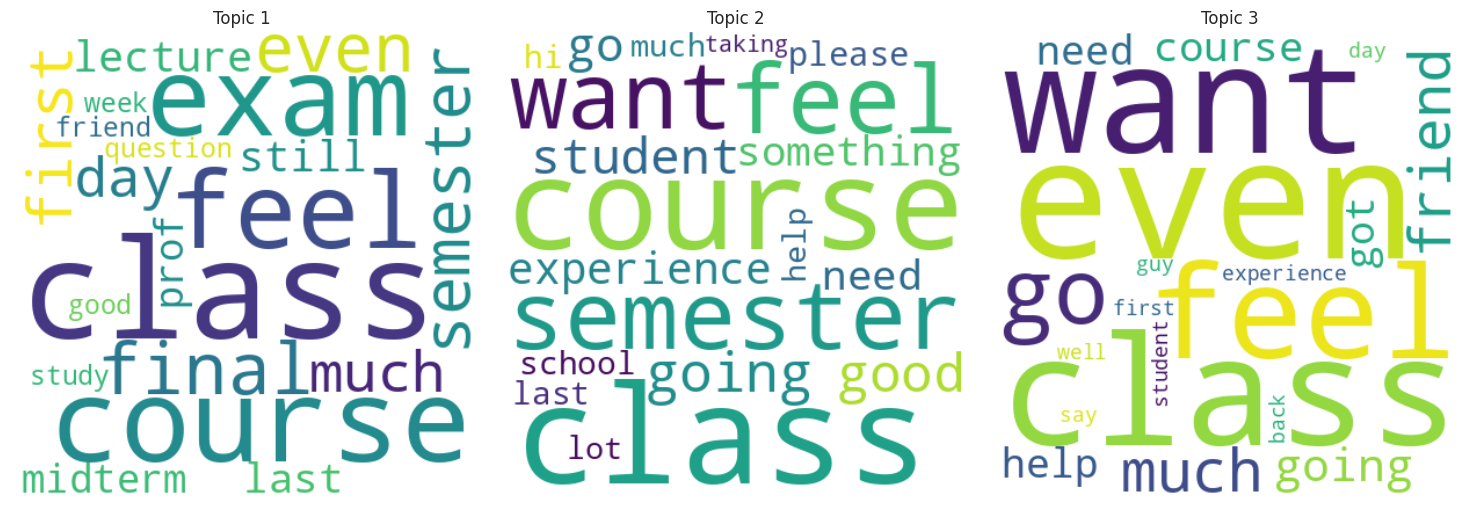

In [ ]:
# Filter for posts marked as 1 in Word2Vec_Depression_Prediction
mcgill_results_filtered = mcgill_results[mcgill_results["Word2Vec_Depression_Prediction"] == 1].copy()

# Apply preprocessing
mcgill_results_filtered["mcgill_results_preprocessed"] = mcgill_results_filtered["selftext_x"].apply(preprocess_text)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(mcgill_results_filtered["mcgill_results_preprocessed"])
corpus = [dictionary.doc2bow(text) for text in mcgill_results_filtered["mcgill_results_preprocessed"]]

# Train LDA Model
num_topics = 3 # Adjustable parameter
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha="auto"
)

# Print topics
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx+1}: {topic}")

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=mcgill_results_filtered["mcgill_results_preprocessed"], dictionary=dictionary, coherence="c_v")
coherence_score = coherence_model_lda.get_coherence()
print(f"\nLDA Model Coherence Score: {coherence_score:.4f}")

# Generate word clouds for each topic
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Topic {i+1}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
mcgill_sentiment = pd.read_csv('mcgill_sentiment_mapped.csv')
mcgill_lebeled = pd.read_csv('predicted_McGill - Copy.csv')

#Merge the mcgill_Df which has the labels with the sentiment version
mcgill_results = pd.merge(mcgill_lebeled, mcgill_sentiment, on='url')
mcgill_results
# Save to CSV
mcgill_results.to_excel("predicted_McGill.xlsx", index=False)
print('mcgill file exported')
#mcgill_results.to_excel("predicted_McGill.xlsx", index=False)

mcgill file exported


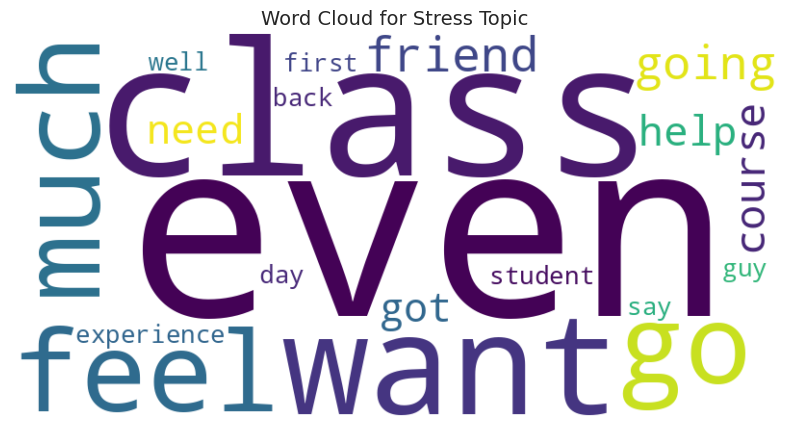

In [ ]:
# Generate a single word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Stress Topic", fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
mcgill_sentiment = pd.read_csv('mcgill_sentiment_mapped.csv')
mcgill_lebeled = pd.read_csv('predicted_McGill - Copy.csv')

#Merge the mcgill_Df which has the labels with the sentiment version
mcgill_results = pd.merge(mcgill_lebeled, mcgill_sentiment, on='url')
mcgill_results
# Save to CSV
mcgill_results.to_excel("predicted_McGill.xlsx", index=False)
print('mcgill file exported')
#mcgill_results.to_excel("predicted_McGill.xlsx", index=False)

mcgill file exported


Topic 1: 0.010*"course" + 0.008*"class" + 0.005*"even" + 0.005*"guy" + 0.004*"didnt" + 0.004*"feel" + 0.004*"exam" + 0.004*"thing" + 0.004*"semester" + 0.004*"got"
Topic 2: 0.011*"class" + 0.005*"need" + 0.005*"else" + 0.005*"student" + 0.005*"want" + 0.005*"go" + 0.005*"first" + 0.005*"course" + 0.004*"feel" + 0.004*"midterm"
Topic 3: 0.010*"exam" + 0.009*"final" + 0.007*"feel" + 0.007*"course" + 0.007*"class" + 0.006*"semester" + 0.006*"even" + 0.005*"grade" + 0.005*"going" + 0.005*"covid"

LDA Model Coherence Score: 0.3700


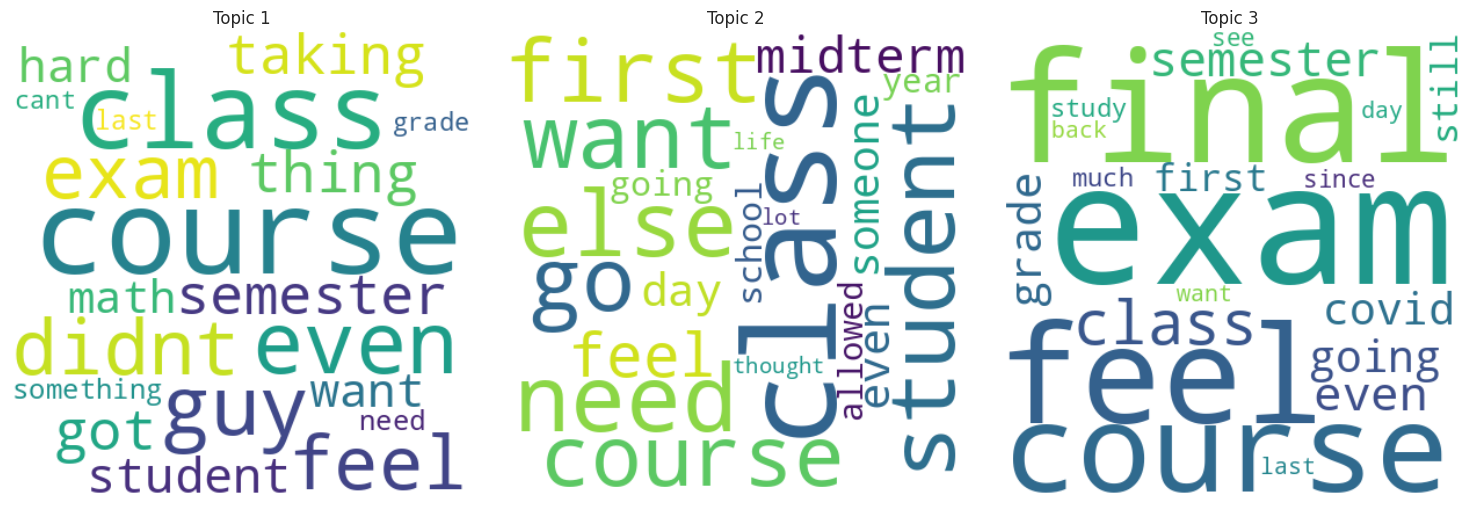

In [ ]:
mcgill_results_filtered = mcgill_results[mcgill_results["selftext_sentiment_label"] != "Positive"]


mcgill_results_filtered = mcgill_results_filtered[
    (mcgill_results_filtered["Word2Vec_Depression_Prediction"] == 1) |
    (mcgill_results_filtered["Word2Vec_Stress_Prediction"] == 1)
]

# Apply preprocessing
mcgill_results_filtered["mcgill_results_preprocessed"] = mcgill_results_filtered["selftext_x"].apply(preprocess_text)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(mcgill_results_filtered["mcgill_results_preprocessed"])
corpus = [dictionary.doc2bow(text) for text in mcgill_results_filtered["mcgill_results_preprocessed"]]

# Train LDA Model
num_topics = 3 # Adjustable parameter
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha="auto"
)

# Print topics
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx+1}: {topic}")

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=mcgill_results_filtered["mcgill_results_preprocessed"], dictionary=dictionary, coherence="c_v")
coherence_score = coherence_model_lda.get_coherence()
print(f"\nLDA Model Coherence Score: {coherence_score:.4f}")

# Generate word clouds for each topic
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Topic {i+1}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()